In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 0
setup_one_gpu(GPU)

Picking GPU 0


In [2]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

from general_tools.notebook.tf import reset_tf_graph

import tf_lab.point_clouds.in_out as pio

from tf_lab.point_clouds.in_out import PointCloudDataSet, write_model_ids_of_datasets

from tf_lab.point_clouds.autoencoder import Configuration as Conf

from tf_lab.autopredictors.scripts.helper import shape_net_category_to_synth_id
                                                  
from general_tools.in_out.basics import create_dir, files_in_subdirs

from general_tools.simpletons import select_first_last_and_k

from geo_tool import Point_Cloud

from tf_lab.point_clouds.gan import model_saver_id

from tf_lab.nips.shape_net import pc_loader as sn_pc_loader

from tf_lab.point_clouds.raw_gan import RawGAN

from tf_lab.point_clouds.generators_discriminators import mlp_discriminator, convolutional_discriminator,\
                                                          point_cloud_generator, leaky_relu, mlp_discriminator

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
save_model = True
save_synthetic_samples = True
class_name = raw_input('Give me the class type.\n').lower()
syn_id = shape_net_category_to_synth_id()[class_name]
synthetic_data_out_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/our_synthetic_samples/'

do_training = True
do_plotting = True
n_pc_samples = 2048

max_epochs = 1500
arch_tag = 'mlp_arch'
leak = 0.2
dropout_prob = 0.5

discriminator = mlp_discriminator
adaptive_training = None

beta = 0.5
disc_kwargs = {'non_linearity': leaky_relu(leak), 'dropout_prob': dropout_prob}
    
generator = point_cloud_generator
gen_kwargs = {'b_norm': False, 'layer_sizes':[64, 128, 256, 512, 1024], 'dropout_prob':dropout_prob}
experiment_name = class_name + '_'+ arch_tag + '_raw_gan_' + str(n_pc_samples) +  '_pts'

Give me the class type.
chair


In [5]:
top_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/'
train_dir = osp.join(top_data_dir, 'OUT/models/nips/gan/raw_gan')
train_dir = osp.join(train_dir, experiment_name)
create_dir(train_dir)

full_pclouds_path = osp.join(top_data_dir, 'Point_Clouds/Shape_Net/Core/from_manifold_meshes/centered/', str(n_pc_samples))
full_pclouds_path = osp.join(full_pclouds_path, syn_id)
full_file_names = pio.load_filenames_of_input_data(full_pclouds_path, '.ply')
full_pclouds, full_model_ids, full_syn_ids = pio.load_crude_point_clouds(file_names=full_file_names,
                                                                           n_threads=25, loader=sn_pc_loader)
print '%d files containing complete point clouds were found.' % (len(full_pclouds), )

6778 files containing complete point clouds were found.


In [6]:
training_data = PointCloudDataSet(full_pclouds)
# training_data = PointCloudDataSet(full_pclouds[:100])

batch_size = 50
noise_params = {'mu':0, 'sigma': 0.5}
noise_dim = 512
init_lr = 0.0001

n_syn_samples = training_data.num_examples  # Same number as original GT data.

In [7]:
reset_tf_graph()

gan = RawGAN(experiment_name, init_lr, [n_pc_samples, 3], noise_dim,
             discriminator, generator, beta=beta, gen_kwargs=gen_kwargs, disc_kwargs=disc_kwargs)

accum_syn_data = []
train_stats = []

1 (1.3758649914352983, 0.70542184291062526) 41.6453630924
2 (1.3579174942440457, 0.72290689503705063) 41.0534100533
3 (1.2747240410910712, 0.83237682625099463) 41.2897641659
4 (1.3459726015726725, 0.78737216967123524) 41.2314388752
5 (1.3582193904452853, 0.72633684785277752) 41.2315950394
6 (1.3420796438499734, 0.74138115114635894) 41.206594944
7 (1.3250532768390797, 0.78079077402750652) 41.2160840034
8 (1.2912870574880528, 0.81091671343202942) 41.2466309071
9 (1.2807721164491441, 0.81183823921062326) 41.1990160942
10 (1.2670852652302496, 0.83775317713066388) 41.3898279667
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-10 is not in all_model_checkpoint_paths. Manually adding it.


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


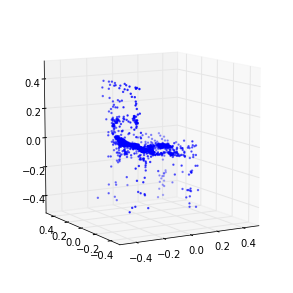

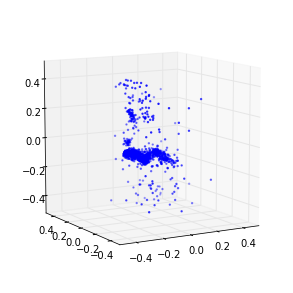

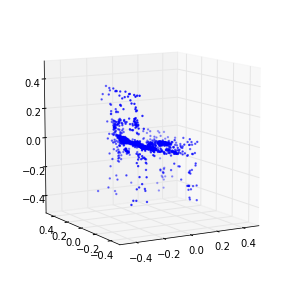

11 (1.2408060162155716, 0.87217599330125029) 41.30210495
12 (1.2227465859165898, 0.89173894546650079) 41.4803380966
13 (1.2134374088711208, 0.89578456657904171) 41.4492180347
14 (1.1957643817972254, 0.90353612149203266) 41.4594640732
15 (1.2364110266720807, 0.87625504798359344) 41.4124419689
16 (1.2382881217532689, 0.87291619512769913) 41.4173748493
17 (1.2609513300436515, 0.85494033407281944) 41.4080488682
18 (1.2671123919663605, 0.86791054849271421) 41.4681661129
19 (1.2622333076265124, 0.86431407597329879) 41.4296870232
20 (1.2486639296566999, 0.8607138333497224) 41.4608249664
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-20 is not in all_model_checkpoint_paths. Manually adding it.


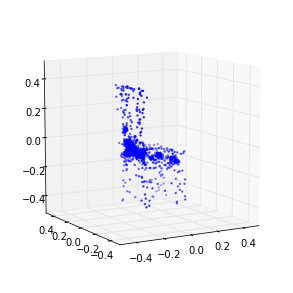

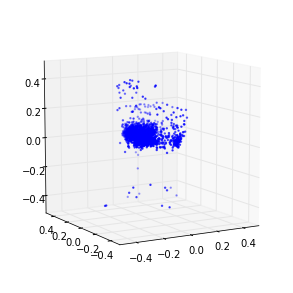

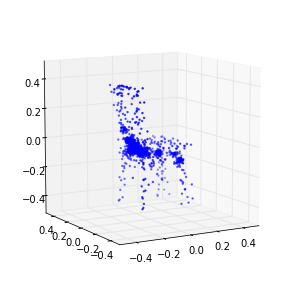

21 (1.2406880449365687, 0.87088947472748934) 41.3744080067
22 (1.2467426035139295, 0.86904261355046875) 41.2807769775
23 (1.2455482959747315, 0.86633584742192871) 41.3536410332
24 (1.2680683462708084, 0.87810266856794006) 41.4431810379
25 (1.2589658489933719, 0.87103193932109413) 41.4350039959
26 (1.2296780683376172, 0.87493050804844608) 41.3903460503
27 (1.2340403539163094, 0.88419619754508694) 41.4010379314
28 (1.2699143365577414, 0.88238680627610944) 41.4678061008
29 (1.2842135985692342, 0.83541906498096608) 41.4767420292
30 (1.2760100196909021, 0.84052895726980992) 41.5619368553
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-30 is not in all_model_checkpoint_paths. Manually adding it.


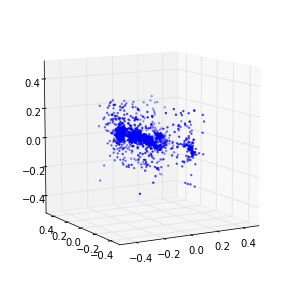

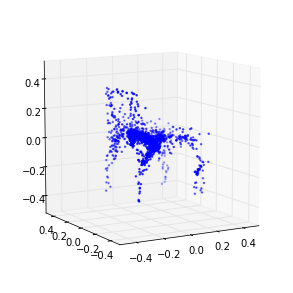

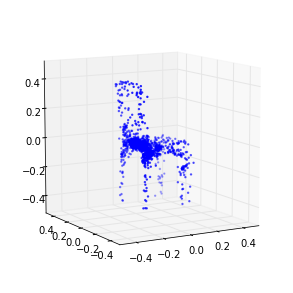

31 (1.2694315027307581, 0.85712040022567471) 41.4532067776
32 (1.295912010581405, 0.8375576074476595) 41.3513140678
33 (1.2910498133412114, 0.8452268125834288) 41.4422390461
34 (1.2990624162885878, 0.81899311984026879) 41.430013895
35 (1.3101186037063599, 0.81441572507222493) 41.4722030163
36 (1.2995680703057184, 0.80945928825272451) 41.5505449772
37 (1.3065018733342488, 0.82179907692803278) 41.5604970455
38 (1.3301626726433082, 0.80459687952642089) 41.5108029842
39 (1.3182719160009313, 0.79787415155658015) 41.5861678123
40 (1.3099267297320896, 0.80435440893526433) 41.4046609402
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-40 is not in all_model_checkpoint_paths. Manually adding it.


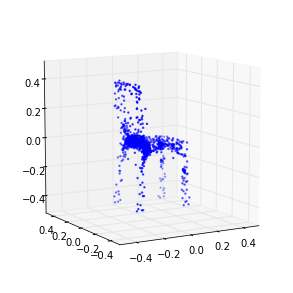

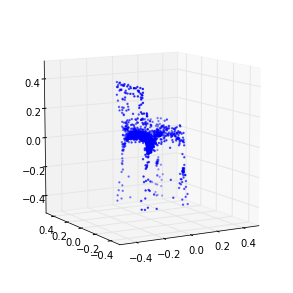

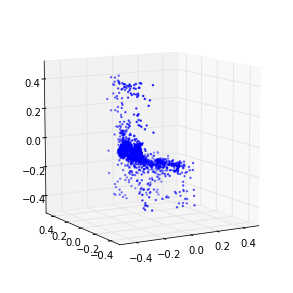

41 (1.3153385762815122, 0.80461169370898489) 41.2503829002
42 (1.3175675630569459, 0.80115716148305827) 41.4006788731
43 (1.3115433030658299, 0.79752443565262687) 41.3868730068
44 (1.3382457079710783, 0.79060319706245707) 41.5748748779
45 (1.3374784160543371, 0.78038327009589581) 41.5768589973
46 (1.3434819451084843, 0.76818346292884265) 41.4763069153
47 (1.3512055352882102, 0.77360883487595455) 41.507144928
48 (1.3380647747604935, 0.7744767217724412) 41.5153980255
49 (1.3413179512377138, 0.77612105453455893) 41.3822140694
50 (1.3432165304819743, 0.7811601877212524) 41.4661939144
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-50 is not in all_model_checkpoint_paths. Manually adding it.


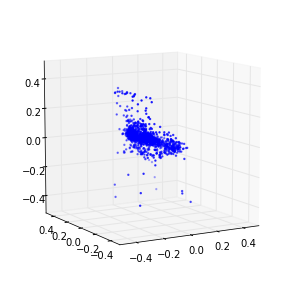

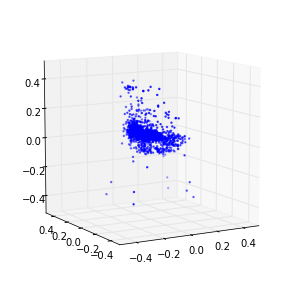

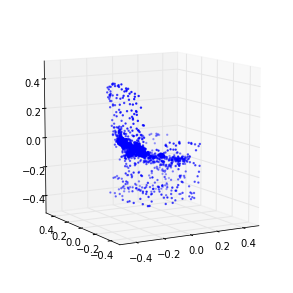

51 (1.3387268340146099, 0.77147589083071111) 41.2606680393
52 (1.3493623353816844, 0.7767920196056366) 41.3085870743
53 (1.3426339061171919, 0.7706728568783513) 41.3097729683
54 (1.3475262103257355, 0.77114370443202829) 41.3581459522
55 (1.3471826756442036, 0.77166611243177341) 41.4709579945
56 (1.3418265854870832, 0.77414895318172594) 41.4129188061
57 (1.3438744235921789, 0.78118657624280008) 41.4425148964
58 (1.3409305722625167, 0.77895749056780783) 41.4514050484
59 (1.3387614762341535, 0.78045508133040531) 41.3869810104
60 (1.3455170145741215, 0.77495285184295093) 41.4437601566
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-60 is not in all_model_checkpoint_paths. Manually adding it.


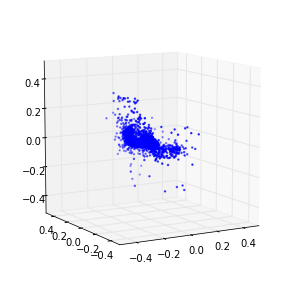

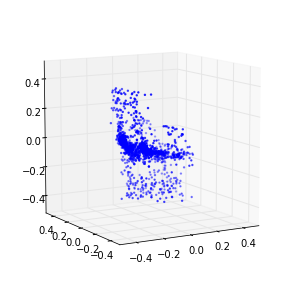

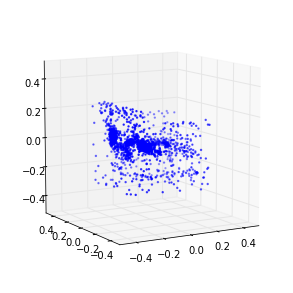

61 (1.3447917876420197, 0.77347180975808039) 41.2920808792
62 (1.3509239320401791, 0.77415984824851702) 41.2648699284
63 (1.3451473121289854, 0.77333656505302151) 41.4198241234
64 (1.3433423157091493, 0.77185363990289191) 41.3558650017
65 (1.3392218483818903, 0.77464457772396234) 41.3970150948
66 (1.3457032018237645, 0.78188130789332921) 41.4057250023
67 (1.3459284217269332, 0.77355961181499344) 41.5033898354
68 (1.3442826315208718, 0.77426764633920453) 41.3802130222
69 (1.3440698040856256, 0.77452941139539078) 41.4080119133
70 (1.3362115268354062, 0.77222935402834858) 41.4500567913
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-70 is not in all_model_checkpoint_paths. Manually adding it.


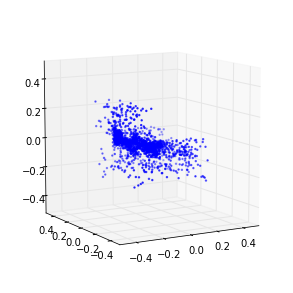

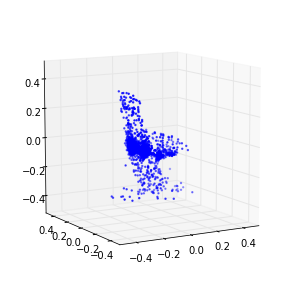

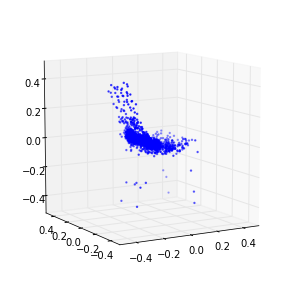

71 (1.3413962629106311, 0.77768851518630977) 41.2646698952
72 (1.3380584681475605, 0.77881663816946523) 41.2342581749
73 (1.342516596228988, 0.77513761343779386) 41.335036993
74 (1.3395847488332677, 0.77612616309413207) 41.3610370159
75 (1.3454145537482367, 0.78192675731800221) 41.4222559929
76 (1.3467253269972626, 0.77397842937045624) 41.3507790565
77 (1.347644110079165, 0.77390859678939539) 41.4088950157
78 (1.342405535556652, 0.77998561572145531) 41.4089541435
79 (1.3423677064754345, 0.77914855612648859) 41.4224288464
80 (1.3440180195702447, 0.77205852844097) 41.3970990181
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-80 is not in all_model_checkpoint_paths. Manually adding it.


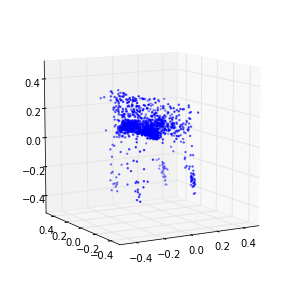

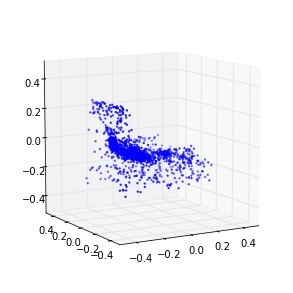

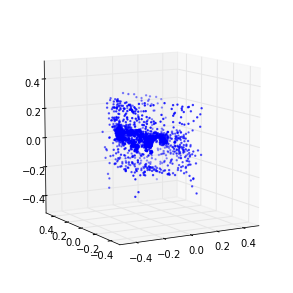

81 (1.3396495042023835, 0.77942159043418036) 41.2700891495
82 (1.3397155011141741, 0.78078268987161137) 41.2489001751
83 (1.3420704912256312, 0.77540888852543299) 41.4528799057
84 (1.343295114128678, 0.77696114601912325) 41.3641870022
85 (1.3430845861081724, 0.77739082464465392) 41.4200780392
86 (1.3455648978551229, 0.77546647632563559) 41.4209649563
87 (1.3420642729158754, 0.7776080109454967) 41.4164500237
88 (1.3454424840432626, 0.77576472781322625) 41.4222490788
89 (1.3463147940459075, 0.77076089470474807) 41.4814291
90 (1.3504556585241247, 0.77115995685259497) 41.4216010571
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-90 is not in all_model_checkpoint_paths. Manually adding it.


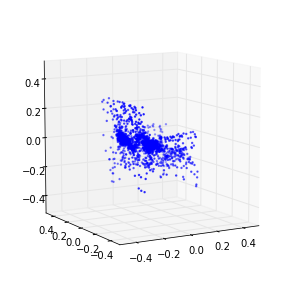

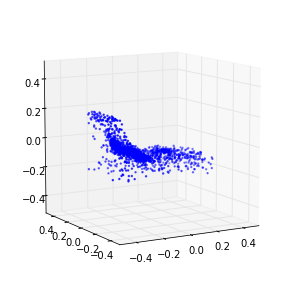

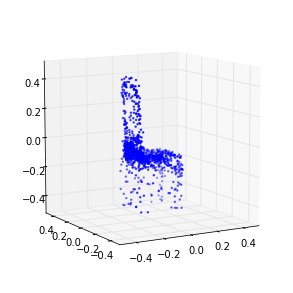

91 (1.3565645977302834, 0.76709491102783767) 41.3682191372
92 (1.3510293907589384, 0.7655644138654073) 41.3004322052
93 (1.3505643332446062, 0.77584983905156457) 41.3959729671
94 (1.348940959683171, 0.76550810292915061) 41.4737379551
95 (1.3481476739600853, 0.77583629555172395) 41.4552550316
96 (1.344708298753809, 0.76861210664113366) 41.4504170418
97 (1.348242837411386, 0.77099961660526417) 41.33157897
98 (1.3508984918947573, 0.77287341797793352) 41.3997280598
99 (1.3503482518372711, 0.7708430802380597) 41.3915009499
100 (1.3514361355039808, 0.77046523844754256) 41.3350710869
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-100 is not in all_model_checkpoint_paths. Manually adding it.


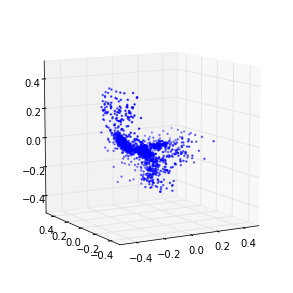

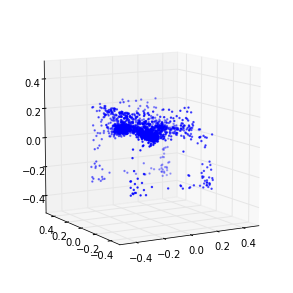

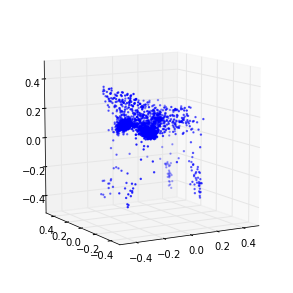

101 (1.3495367111983123, 0.7641750304787247) 41.1341500282
102 (1.3495721428482621, 0.77075701885753212) 41.2986180782
103 (1.3489772646515459, 0.76908297627060507) 41.4222881794
104 (1.3481802401719269, 0.76728775589554399) 41.3734521866
105 (1.3484432732617413, 0.767102712613565) 41.4734361172
106 (1.3555932760238647, 0.76772430207994247) 41.3866400719
107 (1.3523148934046427, 0.76848931974834866) 41.3830699921
108 (1.3472966070528383, 0.76991915327531324) 41.4628179073
109 (1.3430825825090762, 0.77422745095358958) 41.4491550922
110 (1.3426106541245073, 0.77654845493811153) 41.3885490894
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-110 is not in all_model_checkpoint_paths. Manually adding it.


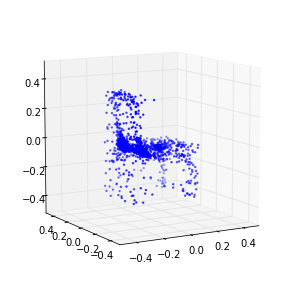

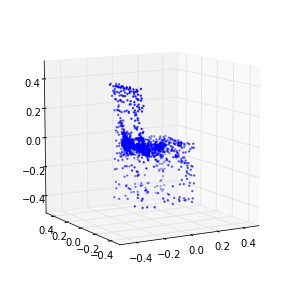

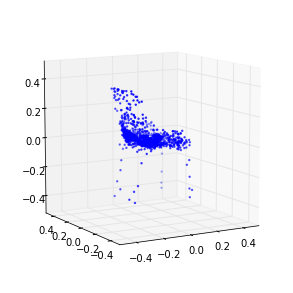

111 (1.344836288911325, 0.77713524412225798) 41.2722380161
112 (1.3465743903760556, 0.76800625500855624) 41.2832961082
113 (1.3508775737550525, 0.77067618458359333) 41.416713953
114 (1.3510118722915649, 0.7659626267574452) 41.3690800667
115 (1.3461687556019535, 0.77539705302980211) 41.3961789608
116 (1.3495400490584197, 0.77355447610219319) 41.4553468227
117 (1.3451500089080246, 0.76990530623330011) 41.4683139324
118 (1.3472044397283482, 0.76870178337450379) 41.4251201153
119 (1.3447555806901721, 0.76961526672045388) 41.3823339939
120 (1.3474310274477359, 0.7714546567863888) 41.3529150486
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-120 is not in all_model_checkpoint_paths. Manually adding it.


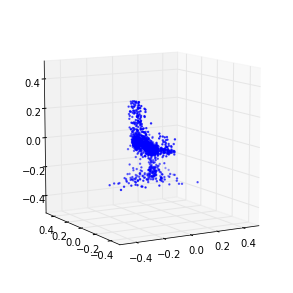

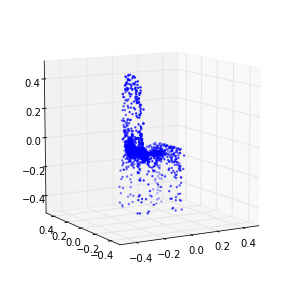

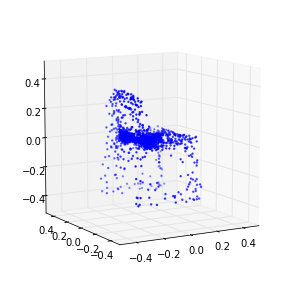

121 (1.3451229881357263, 0.76898466746012373) 41.2159781456
122 (1.346303817960951, 0.77315961166664404) 41.2357559204
123 (1.3482229727285879, 0.77433706036320438) 41.3822050095
124 (1.3420874533829865, 0.77266920363461533) 41.3381550312
125 (1.3428637310310647, 0.77586675065535082) 41.278249979
126 (1.3458041305895205, 0.77488340095237451) 41.3618779182
127 (1.3436187708819354, 0.77720094256930883) 41.4272699356
128 (1.339530062675476, 0.7717414723502265) 41.4392139912
129 (1.33566131150281, 0.77350922469739558) 41.3753829002
130 (1.3414282162984212, 0.77276923744766801) 41.3629388809
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-130 is not in all_model_checkpoint_paths. Manually adding it.


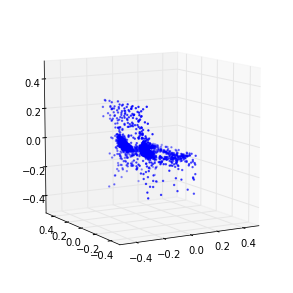

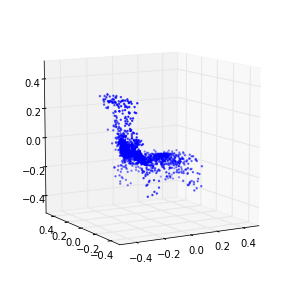

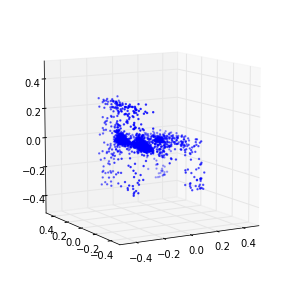

131 (1.338617659498144, 0.7766910435976806) 41.2406420708
132 (1.3399482055946632, 0.77749611934026086) 41.200191021
133 (1.3422329284526684, 0.77042997369059807) 41.3409161568
134 (1.343120966134248, 0.77427014951352724) 41.431153059
135 (1.3464695621419835, 0.77422030281137533) 41.4315750599
136 (1.349588946059898, 0.77249082635950161) 41.4593951702
137 (1.3452412958498354, 0.76820300287670562) 41.3253920078
138 (1.346502470087122, 0.76885014330899271) 41.3495869637
139 (1.3491955660007617, 0.76971566191426033) 41.3309810162
140 (1.3464524189631144, 0.76742580820012973) 41.3985779285
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-140 is not in all_model_checkpoint_paths. Manually adding it.


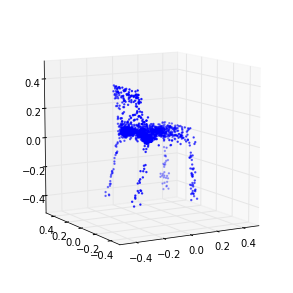

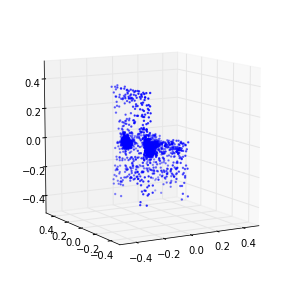

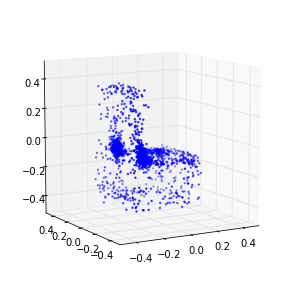

141 (1.3487156276349668, 0.76832320072032789) 41.2521169186
142 (1.3428896073941832, 0.77396368870028742) 41.4044930935
143 (1.3390576857107657, 0.77618901685432151) 41.4411799908
144 (1.3537641746026499, 0.77422355192678949) 41.4514701366
145 (1.3466884471752025, 0.77107626111419114) 41.4685881138
146 (1.351283570572182, 0.76844187400959152) 41.4477918148
147 (1.3455436441633437, 0.77441169994848746) 41.4725530148
148 (1.3477999713685778, 0.77327871013570715) 41.4356031418
149 (1.3481926971011691, 0.76838297799781519) 41.401099205
150 (1.350924919269703, 0.76926607246752143) 41.407900095
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-150 is not in all_model_checkpoint_paths. Manually adding it.


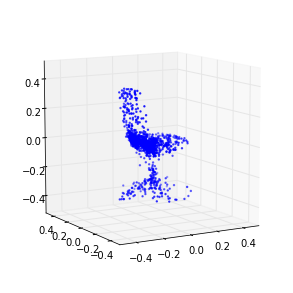

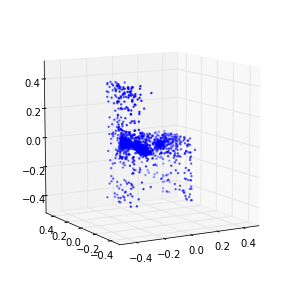

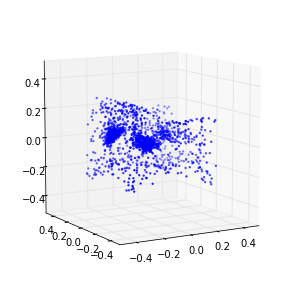

151 (1.3453896345915617, 0.76755911818257083) 41.2678539753
152 (1.3513981501261394, 0.76587784202010545) 41.3166389465
153 (1.3492113722695245, 0.7673908132093924) 41.3212869167
154 (1.3504447760405365, 0.76769593600873598) 41.346077919
155 (1.3512344969643486, 0.76191076702541771) 41.4973449707
156 (1.3511647153783728, 0.7680767712769685) 41.4419159889
157 (1.3540655277393483, 0.7711720173005705) 41.4666888714
158 (1.3460530987492314, 0.77013781732983055) 41.4642710686
159 (1.3516568254541468, 0.7738193896081712) 41.4338448048
160 (1.3511231201666374, 0.76845120191574101) 41.4896008968
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-160 is not in all_model_checkpoint_paths. Manually adding it.


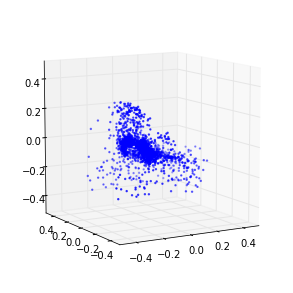

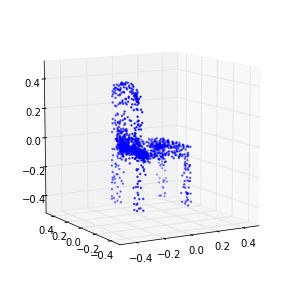

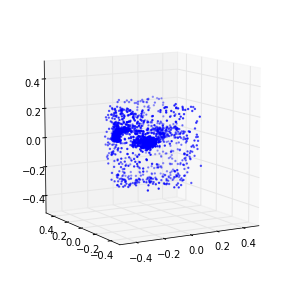

161 (1.3490505871949372, 0.7672861735026042) 41.3246190548
162 (1.3500128083758884, 0.76766580122488515) 41.2697930336
163 (1.3502667762615062, 0.76986468191500068) 41.3907580376
164 (1.3476043595208063, 0.77845217298578329) 41.4749929905
165 (1.3464868209980152, 0.77432823357758696) 41.4344699383
166 (1.348903360190215, 0.77060798185843005) 41.461950779
167 (1.3479974146242495, 0.77261370729517054) 41.4727799892
168 (1.3492426995877866, 0.76599279222665007) 41.4237179756
169 (1.3478216233076872, 0.77245270764386209) 41.4109928608
170 (1.3456497059928045, 0.76443377998140127) 41.5796971321
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-170 is not in all_model_checkpoint_paths. Manually adding it.


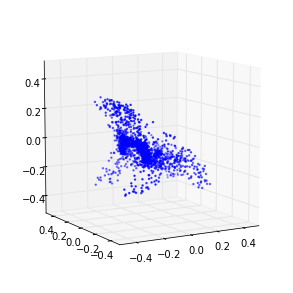

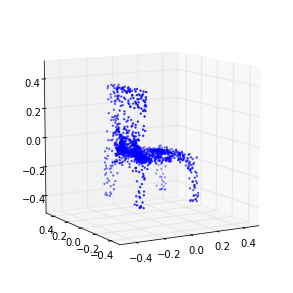

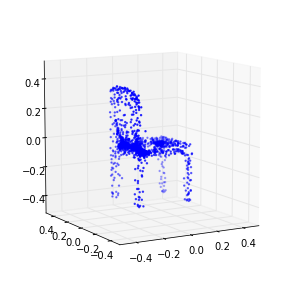

171 (1.3488174244209572, 0.76808262224550605) 41.3150339127
172 (1.3521013462985003, 0.76365850192529183) 41.3440961838
173 (1.3497347778744169, 0.77384687662124629) 41.46164608
174 (1.3414941637604325, 0.77234556586654102) 41.4996070862
175 (1.352291621985259, 0.77205006590595948) 41.4722428322
176 (1.3412048366334703, 0.77636051001372164) 41.4921729565
177 (1.3492602604406851, 0.77178084607477537) 41.4886851311
178 (1.3397082143359713, 0.77413549511520952) 41.445196867
179 (1.3406546831130981, 0.76929437319437666) 41.5102849007
180 (1.3469166164044981, 0.77135693232218427) 41.4150831699
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-180 is not in all_model_checkpoint_paths. Manually adding it.


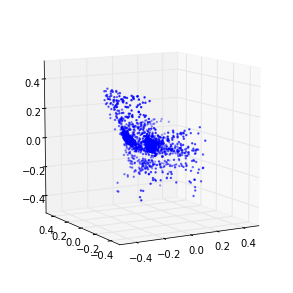

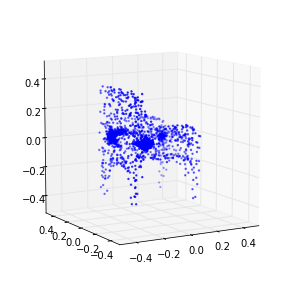

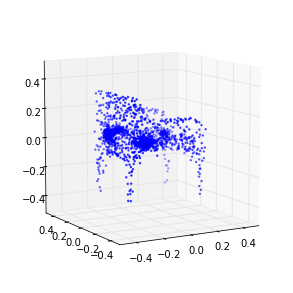

181 (1.3455709236639517, 0.77221305237876048) 41.3296101093
182 (1.3442920658323501, 0.77595090203815031) 41.3317039013
183 (1.3425299211784645, 0.77437479672608556) 41.3655929565
184 (1.347645511450591, 0.77250028804496484) 41.4557070732
185 (1.3442781271757902, 0.77280874737986816) 41.4449589252
186 (1.3467658334308201, 0.77107398068463362) 41.4252779484
187 (1.3427070352766248, 0.77781693405575225) 41.3890330791
188 (1.3422251524748625, 0.77157137217345062) 41.3404660225
189 (1.3431568295867355, 0.7757941250447874) 41.3410739899
190 (1.3390451996414749, 0.77148099740346276) 41.3916888237
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-190 is not in all_model_checkpoint_paths. Manually adding it.


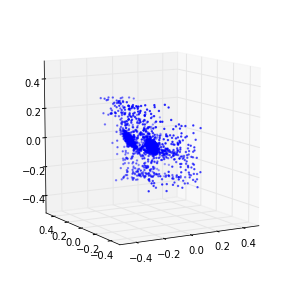

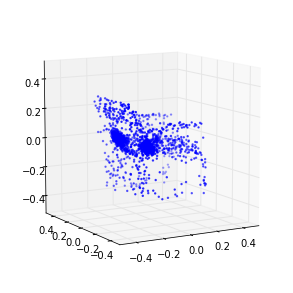

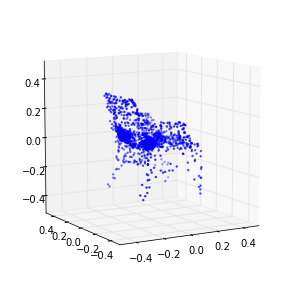

191 (1.3421862699367382, 0.77378975197120947) 41.2714750767
192 (1.3362750124048304, 0.78061960449925172) 41.2671740055
193 (1.3411268622786909, 0.77112778999187326) 41.3172318935
194 (1.350530629687839, 0.77502161374798528) 41.2910590172
195 (1.3408046068968595, 0.77728301794440657) 41.3571870327
196 (1.3345946938903244, 0.77615979909896848) 41.3129169941
197 (1.3367915436073585, 0.77883628827554208) 41.4193921089
198 (1.3331194886454829, 0.77948912183443708) 41.3601820469
199 (1.3405912628880254, 0.78036250891508885) 41.4461300373
200 (1.3376225559799759, 0.78005393522757072) 41.3244709969
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-200 is not in all_model_checkpoint_paths. Manually adding it.


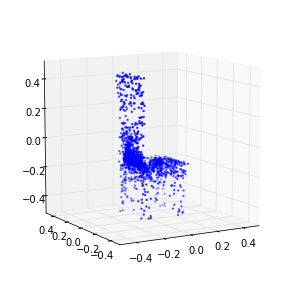

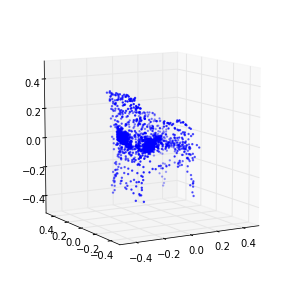

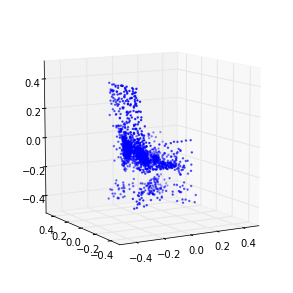

201 (1.3363647725847032, 0.78257282663274697) 41.2587919235
202 (1.3392584023652254, 0.78159939249356591) 41.3257157803
203 (1.3374702321158516, 0.78113186050344396) 41.3071188927
204 (1.3357361563929806, 0.78424586786164174) 41.4002959728
205 (1.3363170403021354, 0.78665829411259403) 41.3511710167
206 (1.3292664492571795, 0.78173567409868594) 41.3068249226
207 (1.3330101693118059, 0.78381732702255247) 41.3416030407
208 (1.3327177674682051, 0.78143604419849533) 41.2963531017
209 (1.3426148953261199, 0.78181251883506775) 41.425121069
210 (1.3407503075069851, 0.77834872139824762) 41.3342781067
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-210 is not in all_model_checkpoint_paths. Manually adding it.


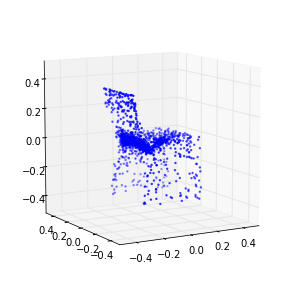

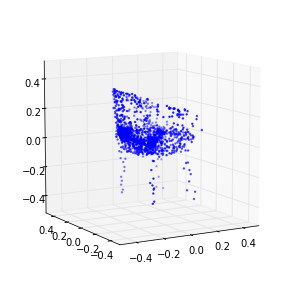

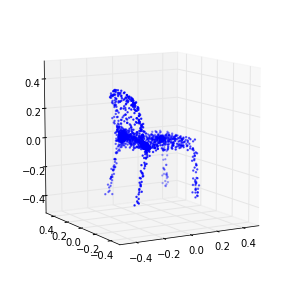

211 (1.3353170324254919, 0.78463906888608581) 41.1311850548
212 (1.3378468531149406, 0.78388519971459003) 41.1636648178
213 (1.3407443973753188, 0.77462904585732351) 41.3919529915
214 (1.3305132680469089, 0.7842193298869663) 41.2777609825
215 (1.332833151464109, 0.78798003682383788) 41.3558959961
216 (1.3283049689398871, 0.78761491643057924) 41.3740200996
217 (1.3284238285488552, 0.78673827118343775) 41.3720419407
218 (1.32904627499757, 0.78593796624077694) 41.3832759857
219 (1.3305584987004597, 0.78439597862738153) 41.3684308529
220 (1.3269497685962253, 0.7944819997858118) 41.2799680233
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-220 is not in all_model_checkpoint_paths. Manually adding it.


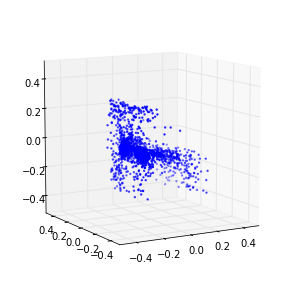

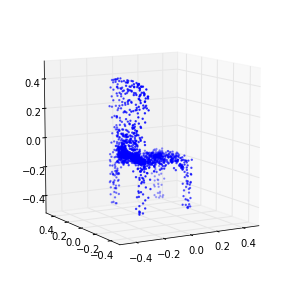

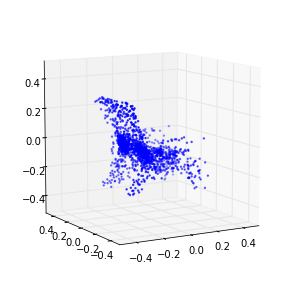

221 (1.3270832070597895, 0.79296972045192016) 41.2067830563
222 (1.3274632727658306, 0.79547891616821287) 41.2264430523
223 (1.3246118898744936, 0.79396389833203074) 41.4447081089
224 (1.3393970374707822, 0.79790762066841125) 41.3511860371
225 (1.3303781050222891, 0.79255638961438779) 41.3901779652
226 (1.3219976990311235, 0.7931420747880582) 41.3826980591
227 (1.331954214307997, 0.79283108534636326) 41.3416399956
228 (1.3231257350356491, 0.79841162650673481) 41.3481650352
229 (1.3280063187634503, 0.79792259225138906) 41.3924498558
230 (1.3226601309246486, 0.80185312231381733) 41.3915259838
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-230 is not in all_model_checkpoint_paths. Manually adding it.


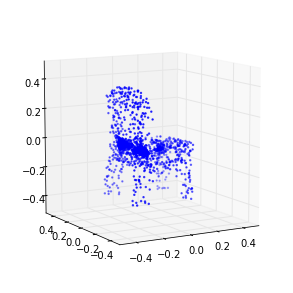

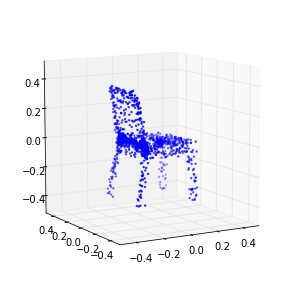

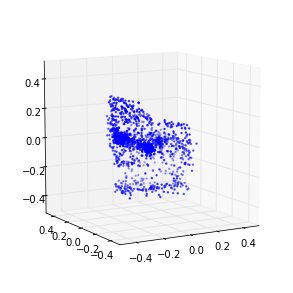

231 (1.3275660744419804, 0.80382374613373364) 41.189029932
232 (1.3255557148544876, 0.78907418383492367) 41.198611021
233 (1.3320249557495116, 0.79587046945536577) 41.3786690235
234 (1.3178967670158104, 0.79844426799703527) 41.3565659523
235 (1.3193246302781281, 0.80324197875128855) 41.363656044
236 (1.3301367079770123, 0.80404815386842798) 41.3158738613
237 (1.3261936964812102, 0.79711328259220826) 41.3883049488
238 (1.3197731291806256, 0.79768311955310678) 41.3526899815
239 (1.3162681049770779, 0.8090217530727386) 41.3115849495
240 (1.3350265123226024, 0.79756215722472579) 41.3047978878
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-240 is not in all_model_checkpoint_paths. Manually adding it.


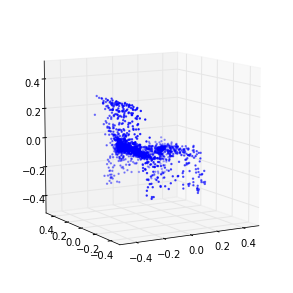

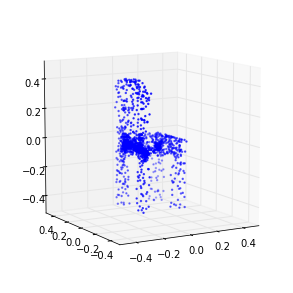

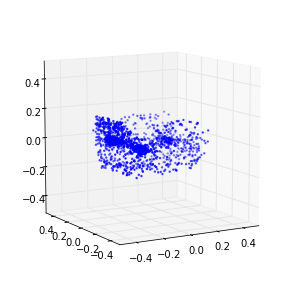

241 (1.3182762684645477, 0.79511521304095234) 41.2119309902
242 (1.3228278195416485, 0.7978757721406442) 41.2042868137
243 (1.3264960474438137, 0.8068429995466162) 41.3443729877
244 (1.3243032349480524, 0.79084132225425152) 41.3884718418
245 (1.3208372407489353, 0.7994947766816175) 41.3293328285
246 (1.3204531298743354, 0.80006983545091415) 41.3633358479
247 (1.3209865446443911, 0.80418463658403472) 41.3743069172
248 (1.3171059581968518, 0.79349603476347752) 41.4222838879
249 (1.3232108884387546, 0.80153694881333248) 41.4427030087
250 (1.3143596251805623, 0.80465996397866146) 41.3728210926
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-250 is not in all_model_checkpoint_paths. Manually adding it.


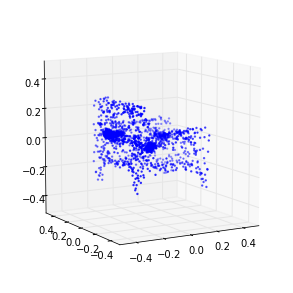

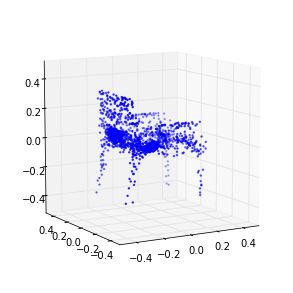

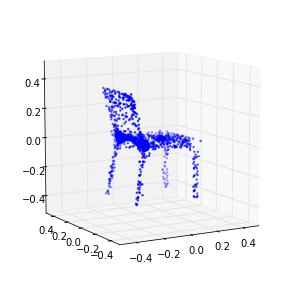

251 (1.3158308029174806, 0.80508174918316033) 41.1699268818
252 (1.3202303683316265, 0.80509506177019186) 41.2178640366
253 (1.3136300537321302, 0.80211346436429909) 41.3394460678
254 (1.3282785865995619, 0.80334908366203306) 41.3553509712
255 (1.3249625515054773, 0.80253959253982265) 41.3032670021
256 (1.3145737047548647, 0.81134282527146517) 41.3255541325
257 (1.3183914440649527, 0.80808098360344216) 41.3222851753
258 (1.3111640135447185, 0.80939116080602014) 41.2922899723
259 (1.3286017824102332, 0.80812510163695728) 41.3830089569
260 (1.3147088633643256, 0.80893321258050421) 41.3326530457
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-260 is not in all_model_checkpoint_paths. Manually adding it.


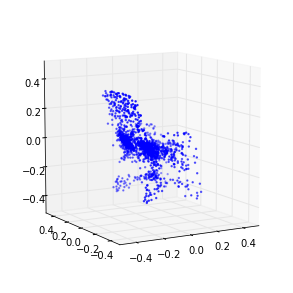

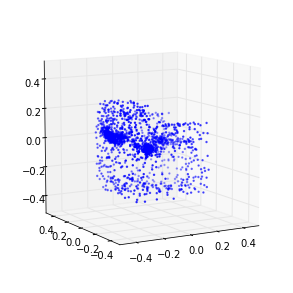

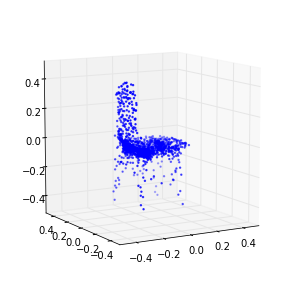

261 (1.3164617344185159, 0.81285477876663204) 41.2010629177
262 (1.3095848736939606, 0.80104920687498871) 41.1015160084
263 (1.3119450860553317, 0.81171415249506629) 41.2108290195
264 (1.3108556906382243, 0.81582569855230824) 41.3128960133
265 (1.3113617066983823, 0.81239404347207811) 41.3085150719
266 (1.316569279741358, 0.8106721233438563) 41.295691967
267 (1.3292683133372554, 0.80222730305459766) 41.362196207
268 (1.3108902993025604, 0.8077668693330553) 41.3080091476
269 (1.3122732701124968, 0.80822632114092507) 41.3218801022
270 (1.312177472644382, 0.80943303947095513) 41.3573231697
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-270 is not in all_model_checkpoint_paths. Manually adding it.


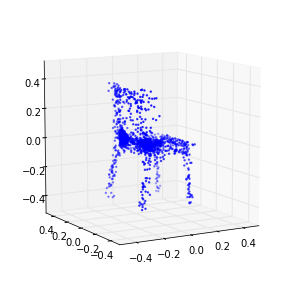

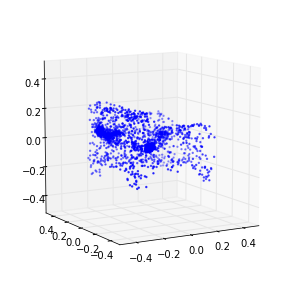

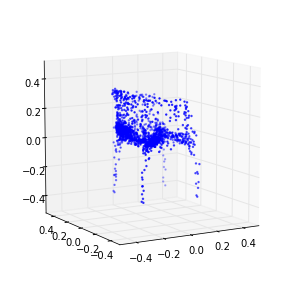

271 (1.290605080569232, 0.82105752936115972) 41.2303628922
272 (1.3067486710018581, 0.82156654000282292) 41.1299369335
273 (1.2972330526069358, 0.81790136187164875) 41.270029068
274 (1.3207777579625448, 0.8139112909634908) 41.320168972
275 (1.3101473190166333, 0.8150090301478351) 41.2342431545
276 (1.2968611584769354, 0.8297135666564659) 41.3027229309
277 (1.291000724721838, 0.82900237418987133) 41.333356142
278 (1.295929738327309, 0.82615451106318716) 41.3347861767
279 (1.3011189734494244, 0.82250457119058684) 41.3245611191
280 (1.2911118419082077, 0.83473439216613765) 41.2852611542
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-280 is not in all_model_checkpoint_paths. Manually adding it.


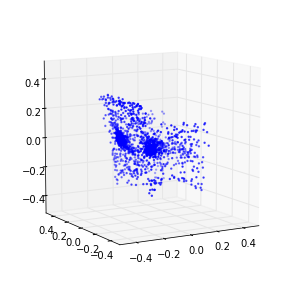

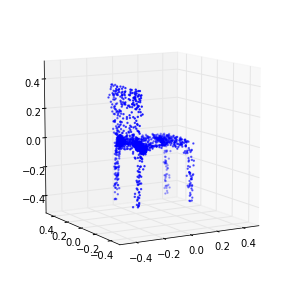

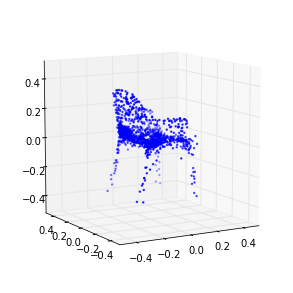

281 (1.3080155575716936, 0.81829858422279356) 41.187693119
282 (1.3102734724680583, 0.8232940554618835) 41.035556078
283 (1.2913230975468954, 0.82661685899451931) 41.2546360493
284 (1.3039201330255579, 0.81948523477271751) 41.2716641426
285 (1.2991026286725644, 0.82712641557057698) 41.2992310524
286 (1.3003601789474488, 0.83215567182611538) 41.2566378117
287 (1.2924897008472018, 0.82970831040982851) 41.2545931339
288 (1.2888407168564973, 0.83622220754623411) 41.3083939552
289 (1.2993637605949684, 0.83082149602748734) 41.3200290203
290 (1.2934406819166961, 0.84082413337848805) 41.352752924
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-290 is not in all_model_checkpoint_paths. Manually adding it.


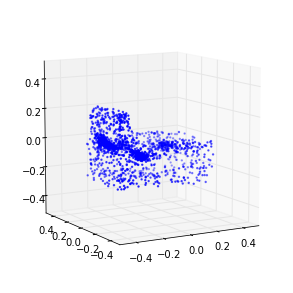

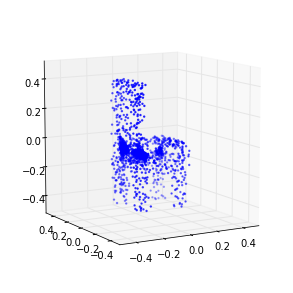

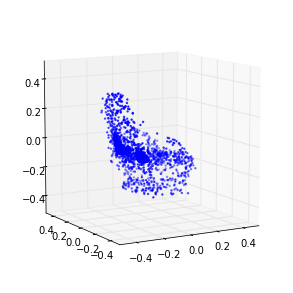

291 (1.2900125468218768, 0.83530204053278323) 41.1274080276
292 (1.2796955576649418, 0.85233382648891876) 41.1547138691
293 (1.2823368028358177, 0.84600547905321477) 41.2825961113
294 (1.2783048276548032, 0.84054910209443834) 41.2949581146
295 (1.2827804503617464, 0.84605321243957232) 41.2709078789
296 (1.2883167911458899, 0.84145230165234319) 41.4185760021
297 (1.2808325237698026, 0.84119080834918547) 41.3402979374
298 (1.2978318700083979, 0.84065109358893497) 41.3877699375
299 (1.2853684222256696, 0.8381274236573113) 41.4080750942
300 (1.2804908001864399, 0.85163887518423576) 41.4674510956
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-300 is not in all_model_checkpoint_paths. Manually adding it.


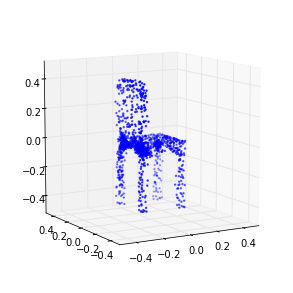

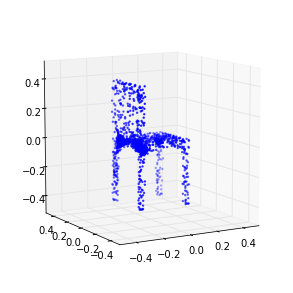

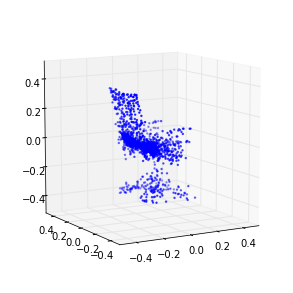

301 (1.2848283087765728, 0.84241576062308421) 41.2477061749
302 (1.2821096093566329, 0.85716921378065036) 41.2077319622
303 (1.2813056080429643, 0.85292518249264471) 41.2874379158
304 (1.2917329576280383, 0.84114423725340104) 41.3495409489
305 (1.2845629798041449, 0.86164688070615136) 41.320294857
306 (1.2790945123743127, 0.84674847655826146) 41.3744308949
307 (1.2722237295574612, 0.86308093115135476) 41.355711937
308 (1.2728500807726826, 0.85413032152034618) 41.3482701778
309 (1.2647462456314653, 0.86108755160261086) 41.2940719128
310 (1.2678635076240257, 0.86899581706082374) 41.3322210312
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-310 is not in all_model_checkpoint_paths. Manually adding it.


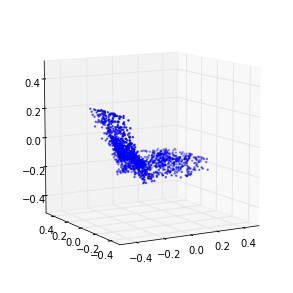

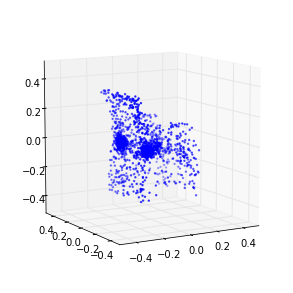

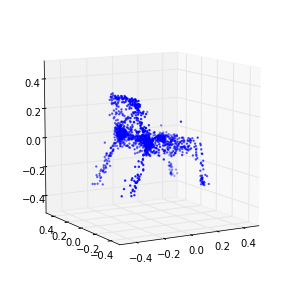

311 (1.2717440746448658, 0.85599598509294017) 41.2062799931
312 (1.2593334939744738, 0.86497635223247382) 41.2245190144
313 (1.2602816307986224, 0.864673188439122) 41.1753101349
314 (1.2799143137755218, 0.85073677080648913) 41.312732935
315 (1.277686999462269, 0.8541089620855119) 41.2679738998
316 (1.2643679901405618, 0.86156358321507776) 41.2792739868
317 (1.2634581115510728, 0.86682950479012943) 41.2756819725
318 (1.2836212255336621, 0.86410121961876196) 41.1882309914
319 (1.2658404897760462, 0.85946209011254482) 41.2502820492
320 (1.2820222510231867, 0.85893861717647979) 41.3429341316
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-320 is not in all_model_checkpoint_paths. Manually adding it.


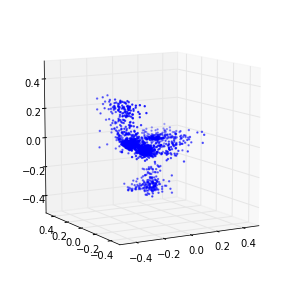

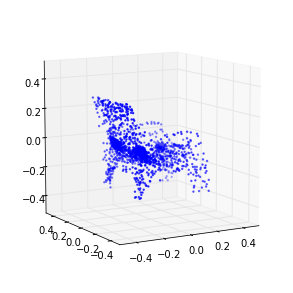

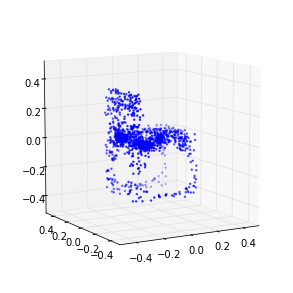

321 (1.273649800265277, 0.85992973248163862) 41.2304620743
322 (1.2566337638431124, 0.86880844809390878) 41.2092471123
323 (1.2767140317846228, 0.85929098857773678) 41.1791419983
324 (1.2647020030904699, 0.86182113400212046) 41.3284230232
325 (1.2665846330148203, 0.86712199846903482) 41.3234400749
326 (1.2739869161888404, 0.86904978178165582) 41.2590069771
327 (1.2677357505868982, 0.85259511691552625) 41.2530341148
328 (1.2658122919223926, 0.87484603237222747) 41.3106119633
329 (1.2823272722738761, 0.85679755961453474) 41.2178080082
330 (1.2652067873213027, 0.86584179710458831) 41.2638859749
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-330 is not in all_model_checkpoint_paths. Manually adding it.


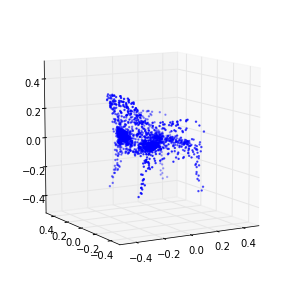

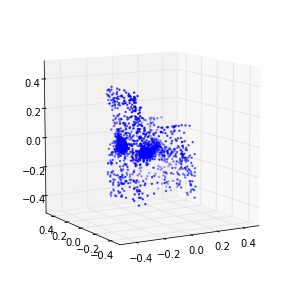

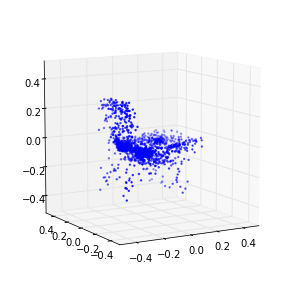

331 (1.2724406136406792, 0.86698864212742555) 41.1895439625
332 (1.2565273249590838, 0.87573136621051362) 41.1620571613
333 (1.2865279727511936, 0.8599678419254444) 41.1871619225
334 (1.2672676192389594, 0.86803757437953244) 41.2966301441
335 (1.2716752131779989, 0.87003308843683314) 41.2254881859
336 (1.2668546950375592, 0.88084793157047692) 41.3274188042
337 (1.2524428252820616, 0.88868728346294823) 41.2084319592
338 (1.2649158654389558, 0.87509742644098065) 41.3673150539
339 (1.2592546957510489, 0.89507331517007616) 41.1985759735
340 (1.2523907166940194, 0.88118374877505834) 41.2795701027
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-340 is not in all_model_checkpoint_paths. Manually adding it.


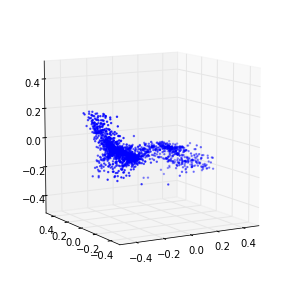

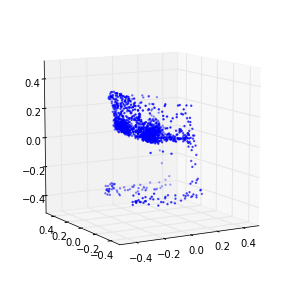

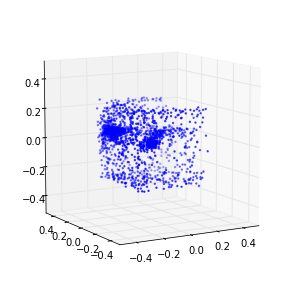

341 (1.2517530520757039, 0.8901064446678868) 41.1736960411
342 (1.2508690630948103, 0.89369775454203293) 41.1989510059
343 (1.2595487329694959, 0.88639358326240825) 41.2428228855
344 (1.2579334144239072, 0.8660154230064816) 41.2651069164
345 (1.2490439326674849, 0.88871654294155267) 41.2655780315
346 (1.2560747217248986, 0.88529756753532973) 41.2426679134
347 (1.2735357761383057, 0.88098268685517489) 41.2825250626
348 (1.2653372172956114, 0.87484548356797964) 41.2683260441
349 (1.2652573532528348, 0.87703066821451536) 41.3084139824
350 (1.26526907020145, 0.87985285123189294) 41.2650959492
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-350 is not in all_model_checkpoint_paths. Manually adding it.


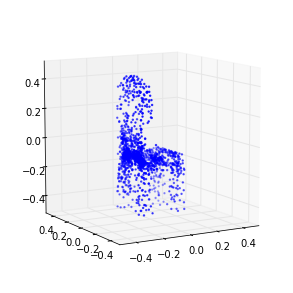

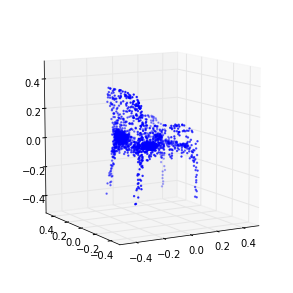

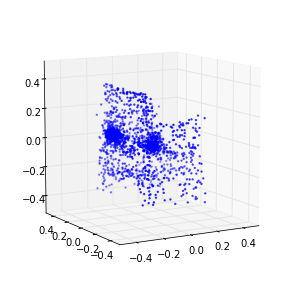

351 (1.2572820795906914, 0.89050652053621082) 41.2256901264
352 (1.2572680111284609, 0.88215494354565938) 41.1846518517
353 (1.2489205987365157, 0.88864845081611921) 41.1708419323
354 (1.2604317435511836, 0.88534792529212103) 41.3135819435
355 (1.2490994524072718, 0.88968749620296339) 41.2568089962
356 (1.2600181712044609, 0.88781361469516051) 41.3060901165
357 (1.2480367113042761, 0.8914065811369154) 41.3307080269
358 (1.2622205407531173, 0.87565405192198575) 41.3195040226
359 (1.2627135815443815, 0.88412257123876503) 41.2747459412
360 (1.2566783057318793, 0.88505588063487295) 41.2048258781
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-360 is not in all_model_checkpoint_paths. Manually adding it.


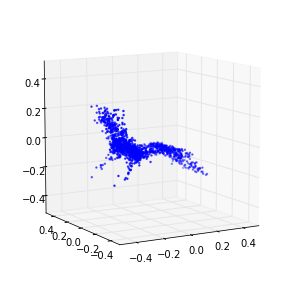

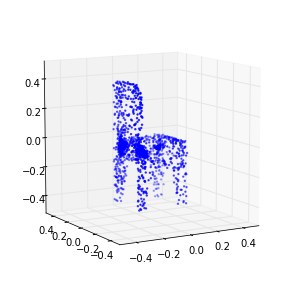

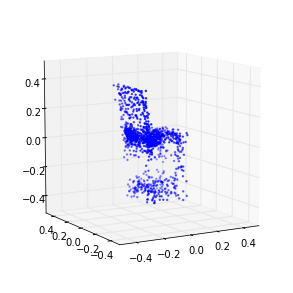

361 (1.2578291998969184, 0.89484864649949247) 41.1593029499
362 (1.2912780611603349, 0.87297441584092594) 41.1976189613
363 (1.2457669991034048, 0.88017132017347544) 41.1479561329
364 (1.2471052575994421, 0.89000402909738041) 41.2154510021
365 (1.2586206630424217, 0.88762751839779042) 41.2184579372
366 (1.2302418699970952, 0.90479777874769984) 41.3013870716
367 (1.2220812347200183, 0.9211976810737893) 41.2525911331
368 (1.2163710797274554, 0.92256789825580743) 41.2661299706
369 (1.2362112928319859, 0.9171892091079995) 41.308836937
370 (1.2505856187255293, 0.89515151050355701) 41.3134980202
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-370 is not in all_model_checkpoint_paths. Manually adding it.


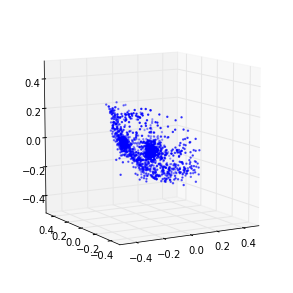

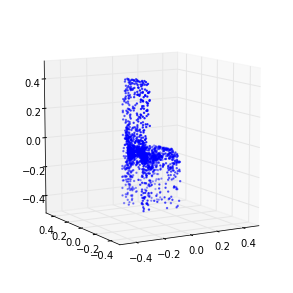

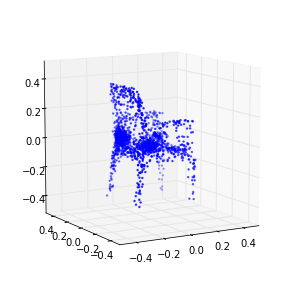

371 (1.2228627708223132, 0.9060004274050395) 41.2396728992
372 (1.2390960525583339, 0.91932204696867204) 41.1948850155
373 (1.2276531731640852, 0.91772076068101105) 41.2286040783
374 (1.2256762425104777, 0.91922688550419274) 41.3011870384
375 (1.2297411344669484, 0.92067714267306855) 41.309335947
376 (1.2249008955778899, 0.90803129628852564) 41.3092651367
377 (1.2171673306712398, 0.93593357602755234) 41.3265390396
378 (1.2165050268173219, 0.9314804465682418) 41.3394730091
379 (1.207404370661135, 0.93472968737284345) 41.355889082
380 (1.2037889321645101, 0.92930763474217171) 41.3274540901
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-380 is not in all_model_checkpoint_paths. Manually adding it.


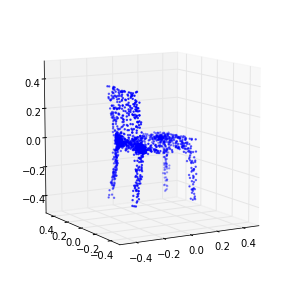

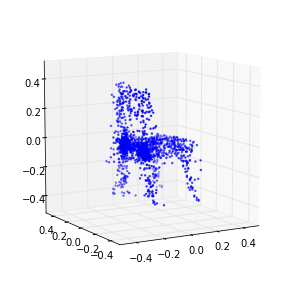

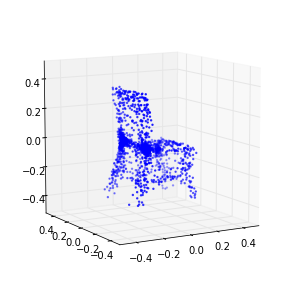

381 (1.2363142534538551, 0.92535555141943471) 41.19617486
382 (1.2153456590793752, 0.93026021983888418) 41.1830558777
383 (1.1993989432299579, 0.94132844849869057) 41.2289958
384 (1.2276422491780035, 0.93640181687143109) 41.2863490582
385 (1.2102762407726713, 0.95229956286924855) 41.2496910095
386 (1.2203778496494999, 0.93013719938419481) 41.2960369587
387 (1.2222138872853032, 0.93969712345688428) 41.2800080776
388 (1.2017264913629602, 0.94844248316906121) 41.3146719933
389 (1.2113804481647632, 0.94845884861769503) 41.3350248337
390 (1.1931140776033755, 0.96030023738189985) 41.2392699718
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-390 is not in all_model_checkpoint_paths. Manually adding it.


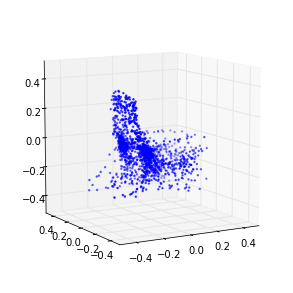

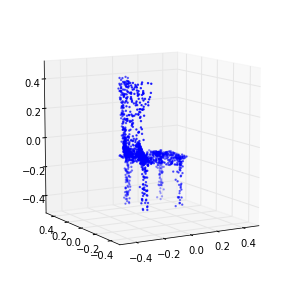

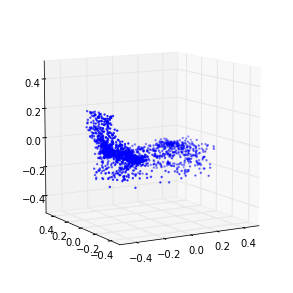

391 (1.2015598694483438, 0.96819684814523765) 41.1926319599
392 (1.2053121937645805, 0.95757749831234962) 41.1789240837
393 (1.1991263027544374, 0.9777721374123185) 41.2163419724
394 (1.2042766341456661, 0.95075507119849878) 41.1873531342
395 (1.1778873046239218, 0.98182155467845778) 41.257956028
396 (1.2021307759814792, 0.95743094638541892) 41.3082940578
397 (1.1955540409794561, 0.95303237129140783) 41.2321081161
398 (1.2083676656087239, 0.95321895656762301) 41.2180171013
399 (1.2116870844805683, 0.94718698704684223) 41.3099811077
400 (1.2067466100056967, 0.93553049211148864) 41.3531520367
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-400 is not in all_model_checkpoint_paths. Manually adding it.


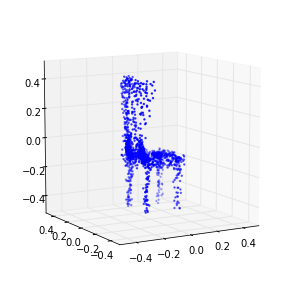

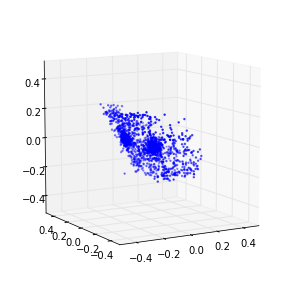

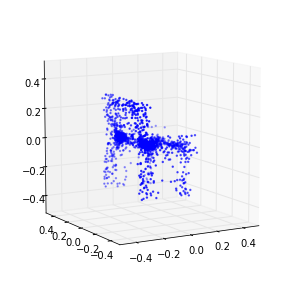

401 (1.1849715789159139, 0.96522104386930108) 41.2033331394
402 (1.2032713165989628, 0.96768126509807728) 41.1935930252
403 (1.205772293055499, 0.95277451740370855) 41.2479069233
404 (1.2006176356916074, 0.9684725951265406) 41.2858028412
405 (1.2141867425706652, 0.96002561118867658) 41.3031811714
406 (1.1938794224350542, 0.98394909081635651) 41.2115600109
407 (1.1689030011494954, 0.97948287328084305) 41.2319779396
408 (1.1625051017160768, 0.99084948786982785) 41.3351800442
409 (1.1706929471757677, 0.98603375620312161) 41.3155760765
410 (1.1957021439516986, 0.97843445892687197) 41.307746172
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-410 is not in all_model_checkpoint_paths. Manually adding it.


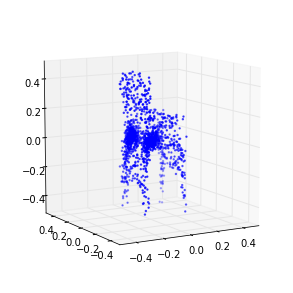

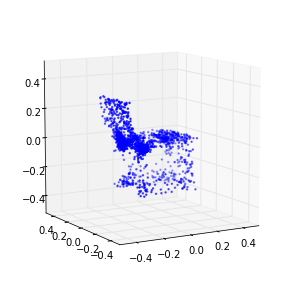

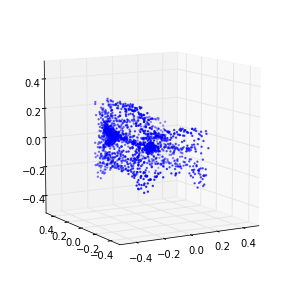

411 (1.1899886563972191, 0.96544178415227822) 41.1879820824
412 (1.1699854599104986, 0.98646179261030975) 41.2011740208
413 (1.1840620893019218, 0.98534483313560484) 41.2318851948
414 (1.2014168408181933, 0.97394207186169091) 41.2836821079
415 (1.1686587898819536, 0.97641536615512992) 41.2276780605
416 (1.166093772429007, 1.0016680640202982) 41.3063628674
417 (1.1428460589161626, 1.0275994024894857) 41.2679657936
418 (1.1526034695130807, 1.0225010637883787) 41.3260240555
419 (1.1838989730234499, 0.98268670837084449) 41.2685189247
420 (1.1597750540132876, 0.99623171311837655) 41.2784750462
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-420 is not in all_model_checkpoint_paths. Manually adding it.


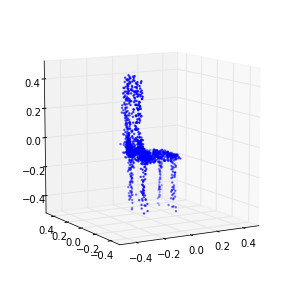

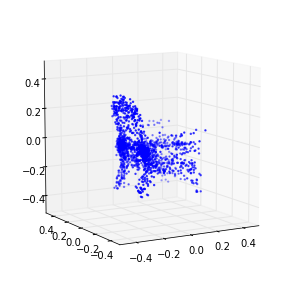

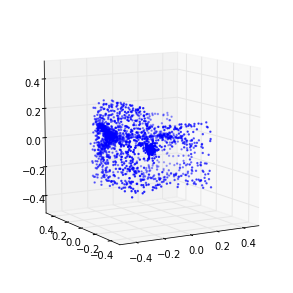

421 (1.1512809161786679, 1.0181989811084888) 41.16843009
422 (1.1722474151187472, 1.0034772581524318) 41.2125852108
423 (1.1464597291416592, 1.0436407040666651) 41.2415959835
424 (1.1788260526127285, 1.0160329812102848) 41.2937171459
425 (1.1767888016170927, 1.0048696487038224) 41.2838850021
426 (1.1642386153892235, 1.0120824014699017) 41.3157601357
427 (1.1445183586191248, 1.0279448487140515) 41.3649280071
428 (1.1421200893543384, 1.0355762539086519) 41.2516710758
429 (1.1553426517380609, 1.0274078691447224) 41.3385670185
430 (1.1638920806072377, 1.0178865591684978) 41.3132679462
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-430 is not in all_model_checkpoint_paths. Manually adding it.


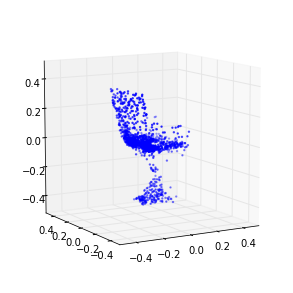

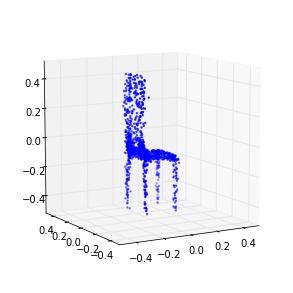

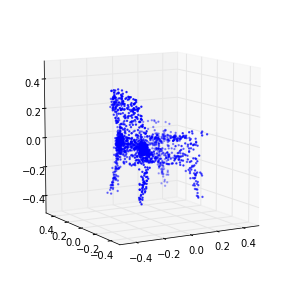

431 (1.167112691755648, 1.0099910683102078) 41.2013661861
432 (1.146660499661057, 1.0249098459879558) 41.2776248455
433 (1.152959946791331, 1.0573134345036965) 41.2615010738
434 (1.1628097710786043, 1.0175919097882731) 41.2774581909
435 (1.15745235769837, 1.0377958955588165) 41.3067998886
436 (1.149272585356677, 1.0283481898131195) 41.3232219219
437 (1.1401026147383231, 1.0555796815289391) 41.3291862011
438 (1.1545723032068322, 1.0248795368053294) 41.3259367943
439 (1.1444225651246529, 1.0487072322103712) 41.2752149105
440 (1.1462183347454777, 1.047183848531158) 41.3585238457
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-440 is not in all_model_checkpoint_paths. Manually adding it.


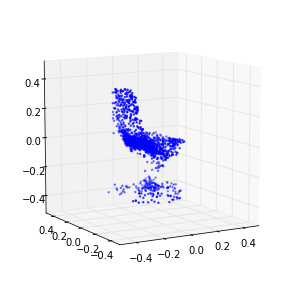

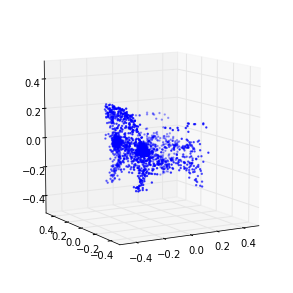

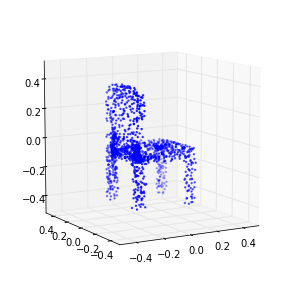

441 (1.1173517964504383, 1.0788574342374448) 41.2545871735
442 (1.1212628090823138, 1.0709368555634111) 41.1718728542
443 (1.123422658443451, 1.0622202310297224) 41.3083620071
444 (1.1326754459628352, 1.0698218478096857) 41.3595421314
445 (1.1146633956167433, 1.0891799721452924) 41.3423330784
446 (1.0934542660359983, 1.0971178690592447) 41.3514471054
447 (1.1182884185402482, 1.0924285723103417) 41.2218110561
448 (1.1420760998019466, 1.0615287213413804) 41.3427941799
449 (1.1403837031788295, 1.0651919702688852) 41.2559299469
450 (1.1115876431818361, 1.0623172172793636) 41.296849966
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-450 is not in all_model_checkpoint_paths. Manually adding it.


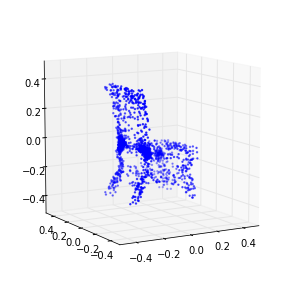

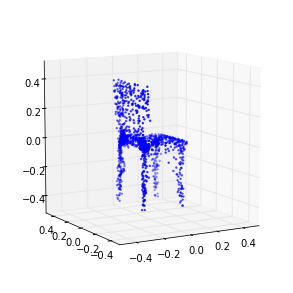

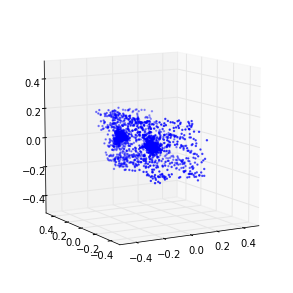

451 (1.1127915700276694, 1.0833374517935295) 41.1561248302
452 (1.1182551330990262, 1.0816687614829452) 41.1851379871
453 (1.127872363284782, 1.0731468556103883) 41.2436218262
454 (1.1270134157604641, 1.0854870723353491) 41.2929348946
455 (1.1510384065133554, 1.0698201378186545) 41.295249939
456 (1.0896987879717792, 1.1147237715897738) 41.328412056
457 (1.0970774875746834, 1.0894526764198587) 41.3513579369
458 (1.1358718664557845, 1.0797760186371981) 41.352768898
459 (1.1088845751903675, 1.0893374363581338) 41.2411949635
460 (1.1388088875346714, 1.0759913705013417) 41.2692878246
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-460 is not in all_model_checkpoint_paths. Manually adding it.


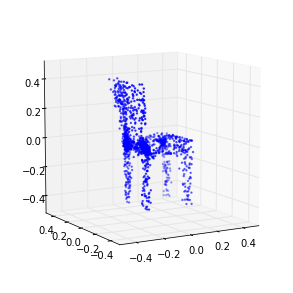

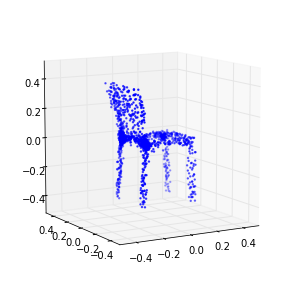

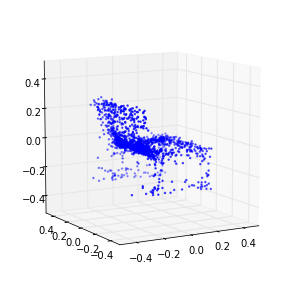

461 (1.1158750847533898, 1.0612338379577355) 41.2114698887
462 (1.1429856481375518, 1.0679851105919591) 41.1832880974
463 (1.1278056069656655, 1.0751968412487596) 41.3170011044
464 (1.1270626394836991, 1.0901474427293849) 41.2983140945
465 (1.1034514608206571, 1.0926123996575674) 41.2437398434
466 (1.11521006292767, 1.072662259914257) 41.2952110767
467 (1.1460205859608121, 1.0530307133992514) 41.3837511539
468 (1.1125603163683857, 1.0882172615439802) 41.302159071
469 (1.1150102491731997, 1.0939863306504709) 41.3594229221
470 (1.0971040381325616, 1.1203464618435612) 41.3197059631
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-470 is not in all_model_checkpoint_paths. Manually adding it.


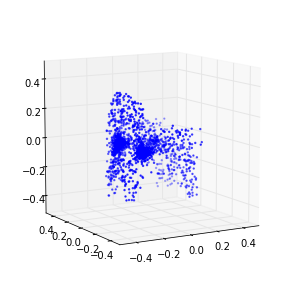

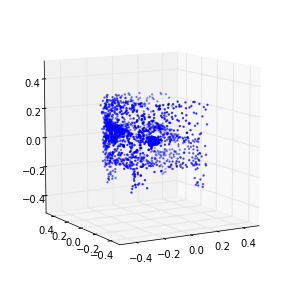

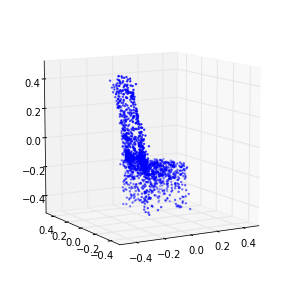

471 (1.1123827166027493, 1.1006015689284714) 41.1342439651
472 (1.1074715548091465, 1.1072389112578498) 41.193114996
473 (1.1026713252067566, 1.0914402842521667) 41.2778530121
474 (1.0936709474634241, 1.101122538248698) 41.2655880451
475 (1.106509311110885, 1.0885025677857576) 41.3125259876
476 (1.1282082800511961, 1.0804675658543905) 41.2981789112
477 (1.1032474963753311, 1.0910824007458158) 41.2435939312
478 (1.1006862026673776, 1.0973339857878508) 41.2930090427
479 (1.0863698301491913, 1.1178060257876361) 41.3462610245
480 (1.103093938032786, 1.124990392393536) 41.3600640297
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-480 is not in all_model_checkpoint_paths. Manually adding it.


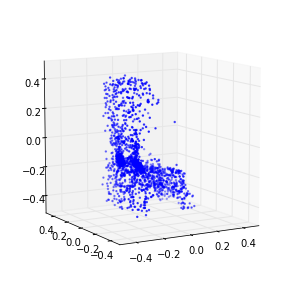

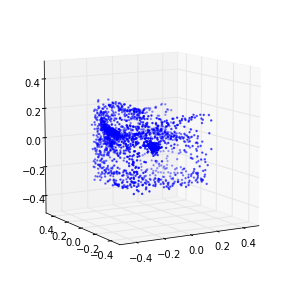

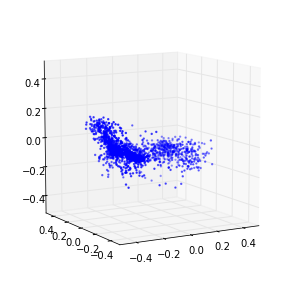

481 (1.0953112160717999, 1.1179970781008401) 41.1882481575
482 (1.1114839439038877, 1.1073372898278413) 41.1090490818
483 (1.0823932215019509, 1.1205313285191854) 41.3047451973
484 (1.0983920097351074, 1.1068023606582924) 41.3653790951
485 (1.1056233260366652, 1.1009071765122591) 41.3432981968
486 (1.1192891284271522, 1.0839318677231118) 41.2901980877
487 (1.0977582295735677, 1.1030788443706654) 41.3159790039
488 (1.0973563410617686, 1.1206183442363034) 41.3712389469
489 (1.0676998407752425, 1.1128292189704048) 41.3336360455
490 (1.1168478193106475, 1.1194418253722014) 41.3104858398
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-490 is not in all_model_checkpoint_paths. Manually adding it.


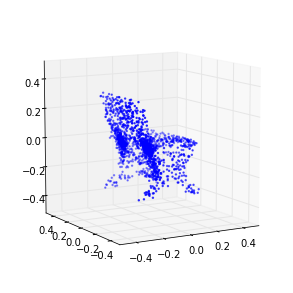

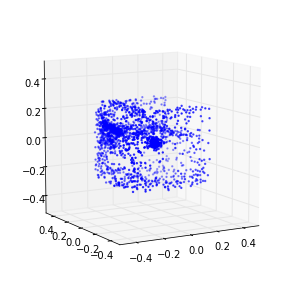

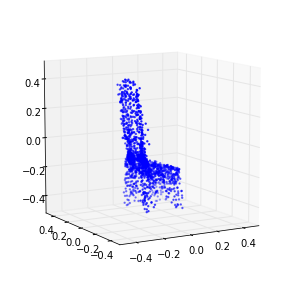

491 (1.100530911816491, 1.0897079896043849) 41.2160818577
492 (1.1028704546116017, 1.1093477573659685) 41.1666040421
493 (1.0826583023424501, 1.1131441306184839) 41.2568190098
494 (1.0683341220573144, 1.1510181775799504) 41.3672938347
495 (1.0877161728011238, 1.1497069473619814) 41.2878901958
496 (1.0860199879716943, 1.1314257577613549) 41.3009040356
497 (1.1035801662339104, 1.1242548635712377) 41.3142051697
498 (1.0926806471965931, 1.1469215017777903) 41.3363189697
499 (1.0874300086939777, 1.1295265696666859) 41.402089119
500 (1.0684905652646666, 1.142709407541487) 41.3345282078
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-500 is not in all_model_checkpoint_paths. Manually adding it.


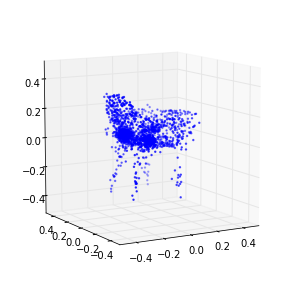

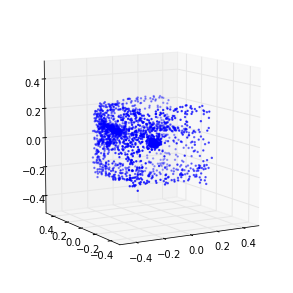

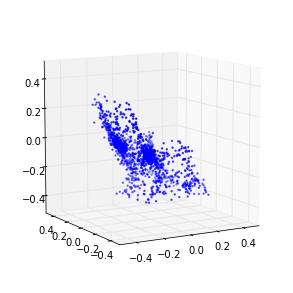

501 (1.050845824347602, 1.171550660221665) 41.2205169201
502 (1.080535520889141, 1.1472212667818422) 41.2506051064
503 (1.0383212667924386, 1.1963710396378129) 41.2817680836
504 (1.1151578470512673, 1.129629922133905) 41.3086469173
505 (1.071259582042694, 1.1562140186627705) 41.3363540173
506 (1.0609855947671114, 1.1823907335599264) 41.3379991055
507 (1.0342196212874519, 1.205192909858845) 41.3688180447
508 (1.0837749476786014, 1.1675093747951366) 41.3831479549
509 (1.024621554657265, 1.2165719213309112) 41.4315941334
510 (1.0559535291459825, 1.2002856276653431) 41.3622839451
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-510 is not in all_model_checkpoint_paths. Manually adding it.


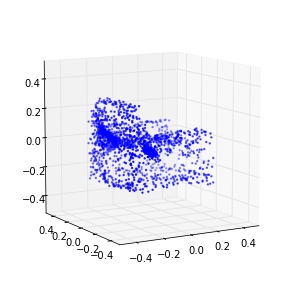

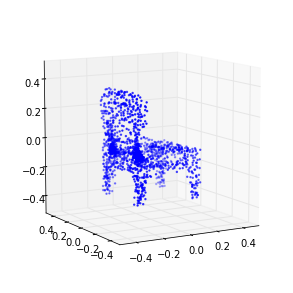

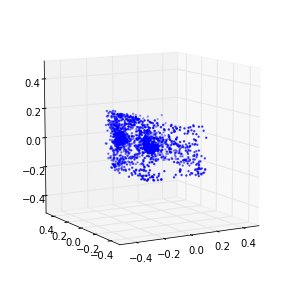

511 (1.0233709534009299, 1.2066661622789172) 41.2266230583
512 (1.0474523486914458, 1.225671324023494) 41.2556781769
513 (1.0381383176203127, 1.1882064708956965) 41.312212944
514 (1.0660262646498504, 1.1989604806458509) 41.4438450336
515 (1.0314865381629379, 1.1952972769737245) 41.4126420021
516 (1.0418901364008586, 1.2131799141565958) 41.3622391224
517 (1.0420288734965855, 1.196832290843681) 41.2695918083
518 (1.0801989069691411, 1.1904331030669035) 41.3491168022
519 (1.0337269641734936, 1.1988997313711378) 41.4796831608
520 (1.04444477558136, 1.184330114611873) 41.3095388412
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-520 is not in all_model_checkpoint_paths. Manually adding it.


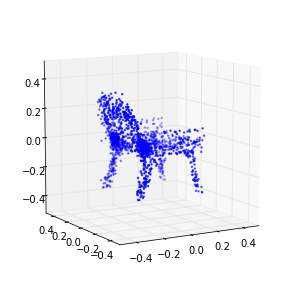

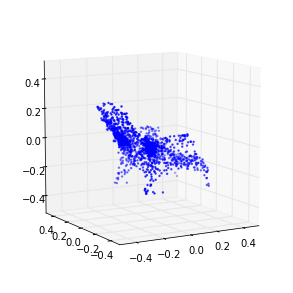

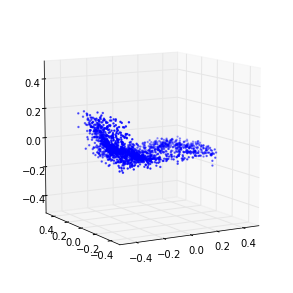

521 (1.0332195087715432, 1.2183726191520692) 41.1684629917
522 (1.0331204374631247, 1.2219373945836667) 41.1765549183
523 (1.0268117335107592, 1.206331491028821) 41.2358219624
524 (1.029524975794333, 1.2222605458012334) 41.2297430038
525 (1.0297562197402672, 1.195933187007904) 41.177298069
526 (1.0151348869005838, 1.214327249703584) 41.1633379459
527 (1.0484732495413887, 1.1837207034782127) 41.1670649052
528 (1.0465250381716975, 1.1919412884447309) 41.2213459015
529 (1.0498368364793282, 1.193877234282317) 41.2131738663
530 (1.024141381405018, 1.2325458639197879) 41.1617269516
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-530 is not in all_model_checkpoint_paths. Manually adding it.


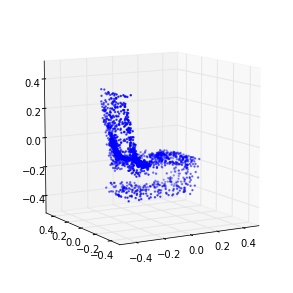

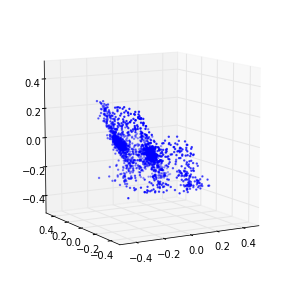

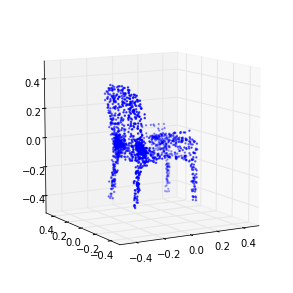

531 (1.0594472302330864, 1.1933807880790146) 41.1873569489
532 (1.0277362364309806, 1.219046417872111) 41.1806359291
533 (1.0503463312431618, 1.2301035192277696) 41.2344129086
534 (1.0304490826748036, 1.2190067503187392) 41.2166149616
535 (1.0933021298161258, 1.1635717815823026) 41.1985220909
536 (1.0933728041472259, 1.1496855550342135) 41.2013781071
537 (1.0461560059476782, 1.2009530676735771) 41.0962209702
538 (1.0235568329139992, 1.2374843639356119) 41.1717200279
539 (0.99359677367740207, 1.2653615112657901) 41.181401968
540 (0.98509346908993189, 1.2880565073755053) 41.1473510265
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-540 is not in all_model_checkpoint_paths. Manually adding it.


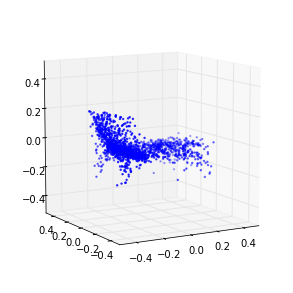

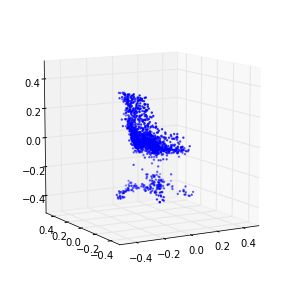

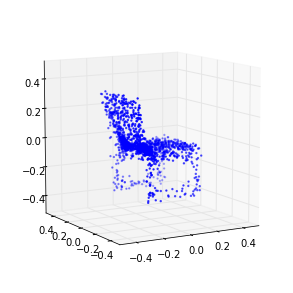

541 (0.98611062279453987, 1.2817125636118429) 41.1944220066
542 (1.0053101989958022, 1.2791100872887506) 41.1642179489
543 (1.0050952209366693, 1.2669226708235564) 41.2016201019
544 (1.014093451588242, 1.2341600513016735) 41.1855828762
545 (1.0120775094738712, 1.2634427203072442) 41.2547128201
546 (1.0326254222128126, 1.2217647473017375) 41.2250640392
547 (1.0082933130087677, 1.2688237265304283) 41.1941618919
548 (1.0307327257262335, 1.2257147709528604) 41.2312529087
549 (1.0120976019788672, 1.2232075585259332) 41.1964271069
550 (1.0347029328346253, 1.2411781593605324) 41.219671011
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-550 is not in all_model_checkpoint_paths. Manually adding it.


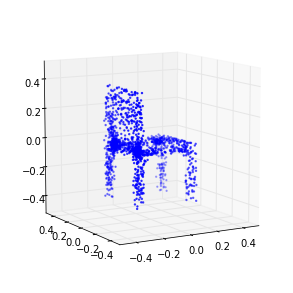

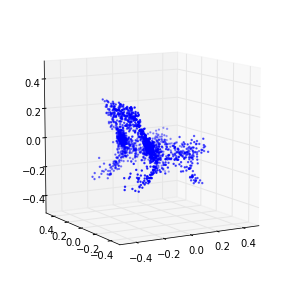

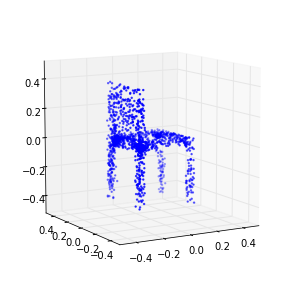

551 (1.0201769669850667, 1.2497629492371172) 41.1872680187
552 (1.0512366339012429, 1.2166214152618691) 41.2015728951
553 (0.96589825992231015, 1.3234003484249115) 41.1916928291
554 (0.99253462376417934, 1.2713366358368485) 41.1469941139
555 (1.0303766855487118, 1.2453916302433721) 41.1829960346
556 (1.0230788575278389, 1.2475055634975434) 41.1967768669
557 (1.0127788230224892, 1.271555898807667) 41.2494339943
558 (1.0087376669601158, 1.2840116434627109) 41.1778049469
559 (1.0187587808679652, 1.2599394725428688) 41.2650499344
560 (1.0116837885644701, 1.2824267996682062) 41.1608932018
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-560 is not in all_model_checkpoint_paths. Manually adding it.


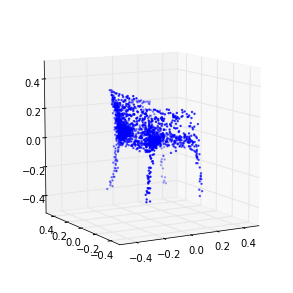

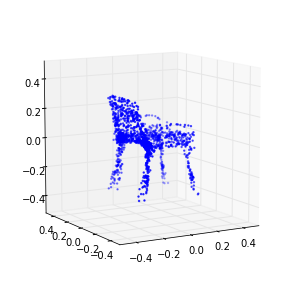

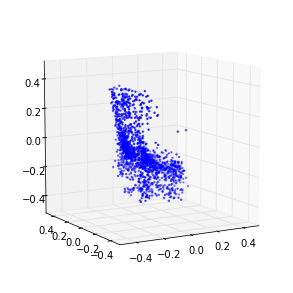

561 (0.99479902585347491, 1.2975655617537323) 41.1032898426
562 (0.9704370578130086, 1.307716257483871) 41.1630380154
563 (1.000624786041401, 1.3052781736409222) 41.2174191475
564 (0.96206934981875947, 1.3017737574047512) 41.2241659164
565 (0.9672909639499806, 1.3024555793514958) 41.1560490131
566 (0.99497483085702965, 1.2762320602381672) 41.1900479794
567 (1.0817309070516516, 1.2112012863159181) 41.2187650204
568 (1.0051720177685772, 1.3254350781440736) 41.1739759445
569 (0.9655852441434507, 1.3626640010763098) 41.1781618595
570 (0.97677437287789803, 1.340864645993268) 41.1397550106
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-570 is not in all_model_checkpoint_paths. Manually adding it.


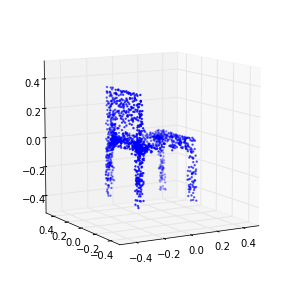

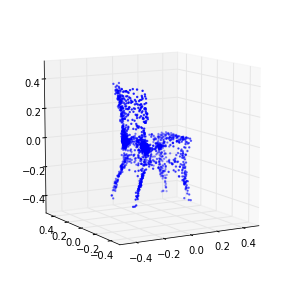

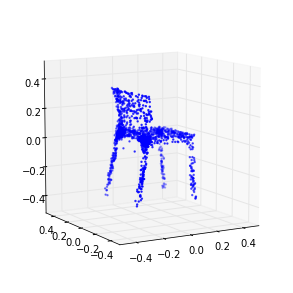

571 (0.95848094622294111, 1.3401994753766944) 41.1591649055
572 (1.0140435011298568, 1.3184901926252577) 41.1649129391
573 (1.0041546530193752, 1.3273569873085729) 41.1740460396
574 (0.99707983334859207, 1.2907814657246626) 41.1771671772
575 (0.9935393792611581, 1.2624131772253249) 41.1712880135
576 (0.96155870269846033, 1.3419112660266734) 41.1558759212
577 (1.0010358845746075, 1.3045350979875636) 41.1717641354
578 (1.0123809050630641, 1.3166722328574569) 41.1717689037
579 (1.0364395300547282, 1.2592911190456815) 41.1949369907
580 (0.98321936527887976, 1.3085320379998948) 41.2235059738
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-580 is not in all_model_checkpoint_paths. Manually adding it.


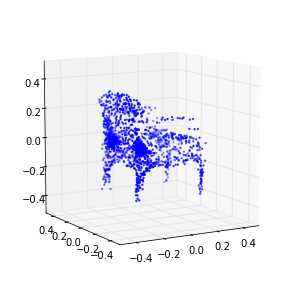

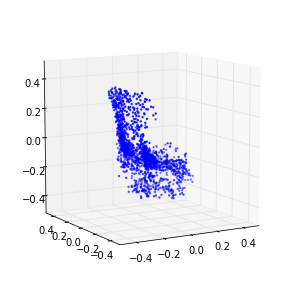

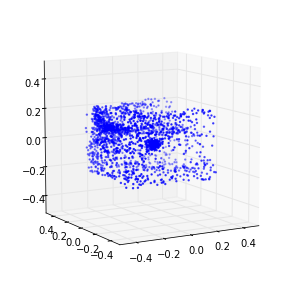

581 (0.94063960931919244, 1.3898855341805352) 41.171284914
582 (0.98303435687665586, 1.3392832318941752) 41.1067140102
583 (1.0225977133821558, 1.2693700534326058) 41.16147995
584 (0.9827448513772753, 1.3028545609226934) 41.1982951164
585 (1.0054974595705668, 1.2916622669608504) 41.251322031
586 (1.0160642906471535, 1.31699231311127) 41.2038280964
587 (0.98490445967073792, 1.3111352443695068) 41.2085421085
588 (0.94527378700397635, 1.3668802102406821) 41.1960208416
589 (0.9862192220158047, 1.3032788153047914) 41.2029759884
590 (0.97612446414099796, 1.3047070203004061) 41.1804151535
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-590 is not in all_model_checkpoint_paths. Manually adding it.


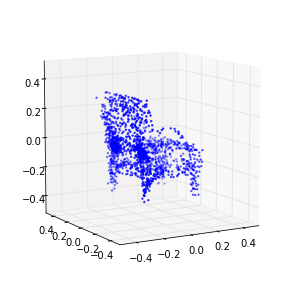

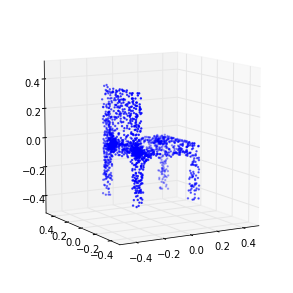

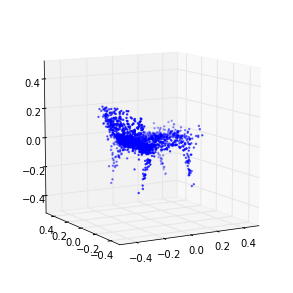

591 (1.0297616910051417, 1.2797190732426114) 41.1658368111
592 (0.98458650509516399, 1.2970225921383611) 41.1657440662
593 (0.97974289479079069, 1.3304604892377501) 41.2098019123
594 (1.0102275707103587, 1.3134989455894188) 41.2178800106
595 (0.99176640422255902, 1.3161521425953617) 41.2271039486
596 (0.98262860995751844, 1.3162868241469066) 41.2576420307
597 (0.99433289148189408, 1.3204142486607586) 41.2894151211
598 (0.94836164801209066, 1.3295409109857348) 41.2553498745
599 (0.97919612416514645, 1.3292140788502163) 41.2936718464
600 (0.98324700505645191, 1.339913500238348) 41.2381761074
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-600 is not in all_model_checkpoint_paths. Manually adding it.


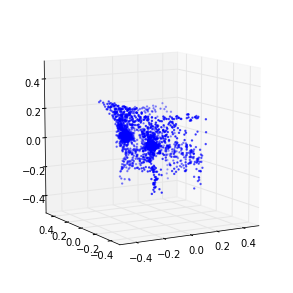

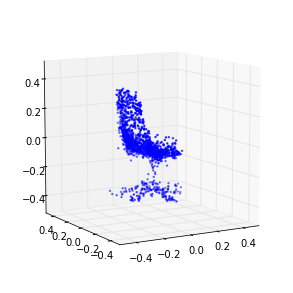

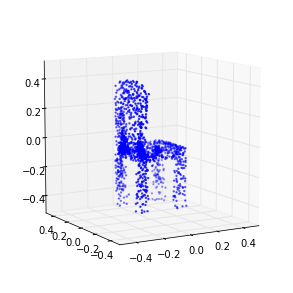

601 (0.9838153273970992, 1.3271176448574773) 41.2114479542
602 (1.0025137830663611, 1.296263622354578) 41.140365839
603 (0.96951660800863193, 1.3540247444753293) 41.1635260582
604 (0.96649003470385519, 1.3264488003872059) 41.1538529396
605 (0.96281539996465049, 1.3708561385119402) 41.2096610069
606 (0.94787946188891381, 1.3763501034842598) 41.1831731796
607 (0.95521537639476639, 1.3767686843872071) 41.1955668926
608 (0.95758518289636685, 1.3511987915745487) 41.2388141155
609 (0.93042283543833981, 1.3695124944051107) 41.187625885
610 (1.0010962720270511, 1.334290713954855) 41.1803739071
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-610 is not in all_model_checkpoint_paths. Manually adding it.


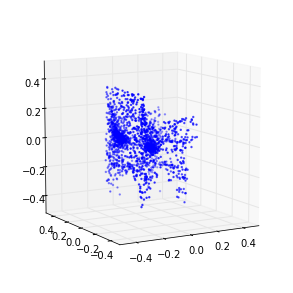

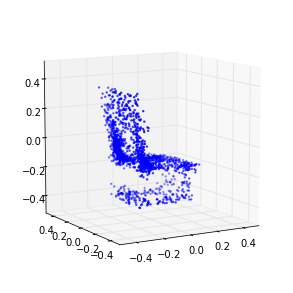

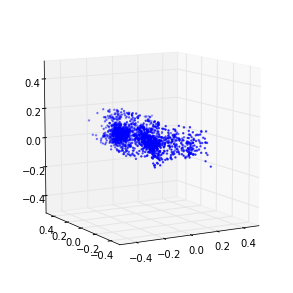

611 (0.9759427048541881, 1.3507272031572131) 41.1860728264
612 (0.95333721549422656, 1.3628546745688828) 41.1400220394
613 (0.99088010081538447, 1.4003028366300794) 41.2104139328
614 (0.94956982621440178, 1.3180566253485504) 41.186809063
615 (0.9301576910195527, 1.3893568952878317) 41.2136449814
616 (0.98876239591174653, 1.3979995411855204) 41.1445350647
617 (0.92479647265540232, 1.3678096744749282) 41.1680619717
618 (1.0227941120112385, 1.337903611306791) 41.1676940918
619 (1.0058410441433943, 1.3375803486064628) 41.164411068
620 (0.98629661533567636, 1.3346912887361315) 41.2064840794
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/chair_mlp_arch_raw_gan_2048_pts/models.ckpt-620 is not in all_model_checkpoint_paths. Manually adding it.


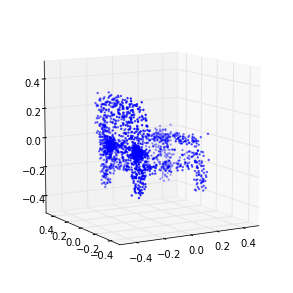

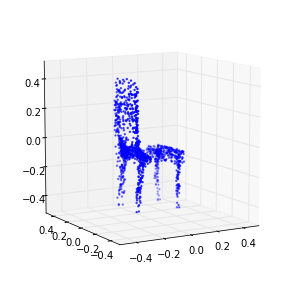

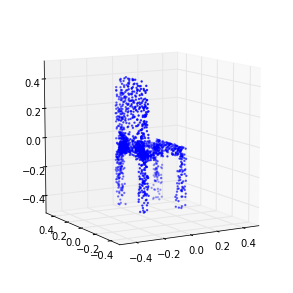

In [ ]:
if do_training:
    for _ in range(max_epochs + 1):
        loss, duration = gan._single_epoch_train(training_data, batch_size, noise_params, adaptive=adaptive_training)
        epoch = int(gan.sess.run(gan.epoch.assign_add(tf.constant(1.0))))
        print epoch, loss, duration
        if save_model and epoch % 10 == 0:
            checkpoint_path = osp.join(train_dir, model_saver_id)
            gan.saver.save(gan.sess, checkpoint_path, global_step=gan.epoch)
            syn_d = gan.generate(n_syn_samples, noise_params)
            accum_syn_data.append(syn_d)
            for k in range(3):
                Point_Cloud(syn_d[k]).plot(in_u_sphere=True)
        train_stats.append((epoch,) + loss)

In [ ]:
epoch_to_check = 1500
n_check = 5
check_data = accum_syn_data[(epoch_to_check / 10)-1]
rids = np.random.choice(range(len(check_data)), size=n_check, replace=False)
for i in range(n_check):
    Point_Cloud(check_data[rids[i]]).plot(in_u_sphere=True)    

In [ ]:
if do_plotting:
    x = range(len(train_stats))
    d_loss = [t[1] for t in train_stats]
    g_loss = [t[2] for t in train_stats]
    plt.plot(x, d_loss)
    plt.plot(x, g_loss)
    plt.title('Raw GAN training. (%s, %s)' % (class_name, arch_tag) )
    plt.legend(['d_loss', 'g_loss'], loc=0)
    plt.xlabel('Epochs.')
    plt.ylabel('Loss.')

In [ ]:
synthetic_data_out_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/our_synthetic_samples/'
saver_step = 10
if save_synthetic_samples:
    save_dir = osp.join(synthetic_data_out_dir, experiment_name)
    create_dir(save_dir)    
    for i, d in enumerate(accum_syn_data):
        epoc = str((i + 1) * saver_step)
        np.savez(osp.join(save_dir, 'epoch_' + epoc), d)